# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stock_data = pd.read_csv("/content/stock_data.csv")

In [ ]:
#making a copy of the dataset
data = stock_data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape

(340, 15)

There are 340 observations and 15 columns in the dataset

In [ ]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

The attributes `Ticker Symbol`, `Security`, `GICS Sector`, `GICS Sub Industry` are of object type while the other attributes are numerical

###Checking for duplicates and missing values

In [ ]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing values in the dataset

In [ ]:
data.duplicated().sum()

0

There are no duplicates in the dataset

###Statistical Summary

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0




*  The columns `Ticker Symbol` and `Security` are unique for each observation
*  Industrials is the most frequently occuring GICS Sector in the dataset

*  Oil & Gas Exploration & Production is the most common GICS Sub Industry
*  The other variables are financial indicators in the dataset. The negative values in the dataset are completely normal for financial indicators






## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

###**Functions to carry out EDA**

In [ ]:
# Function to create histograms and boxplots
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    #Creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )
    # Boxplot will be created and a triangle will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    # Adds mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    # Adds median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
#Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##Univariate Analysis

###GICS Sector

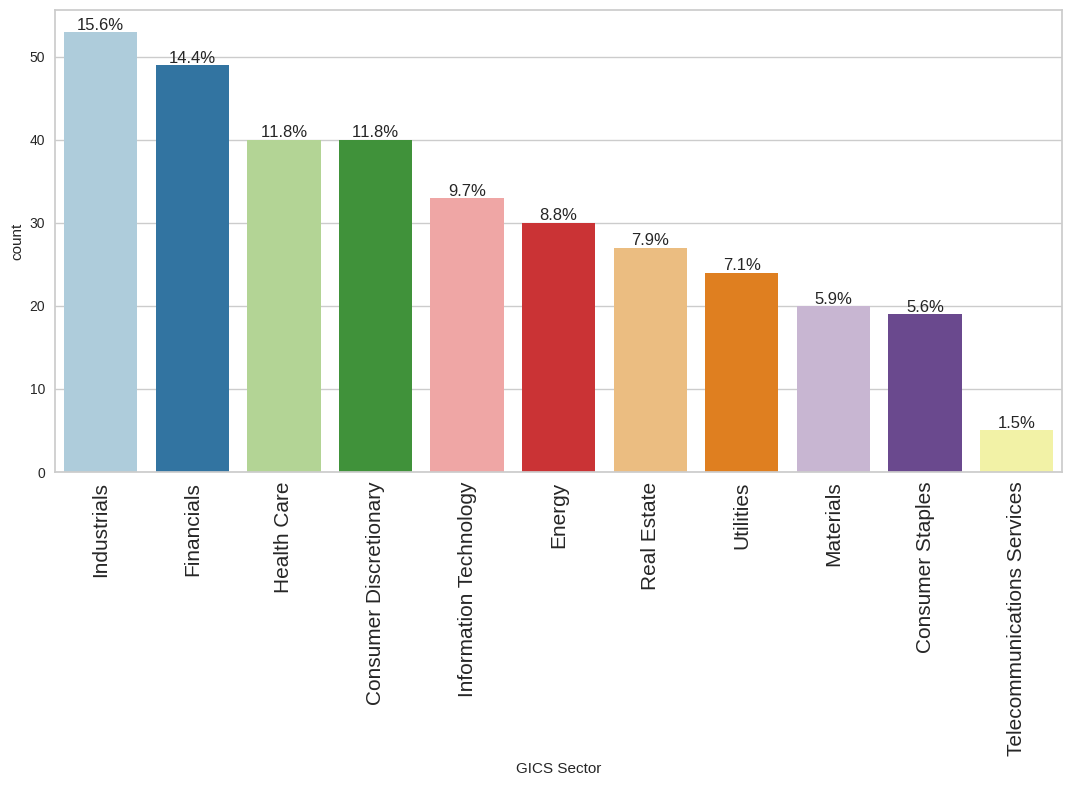

In [ ]:
labeled_barplot(data, "GICS Sector", perc=True)

The most common GICS sector is the Industrials, followed by Financials while Telecommunication Services is the least occuring in the dataset

###GICS Sub Industry

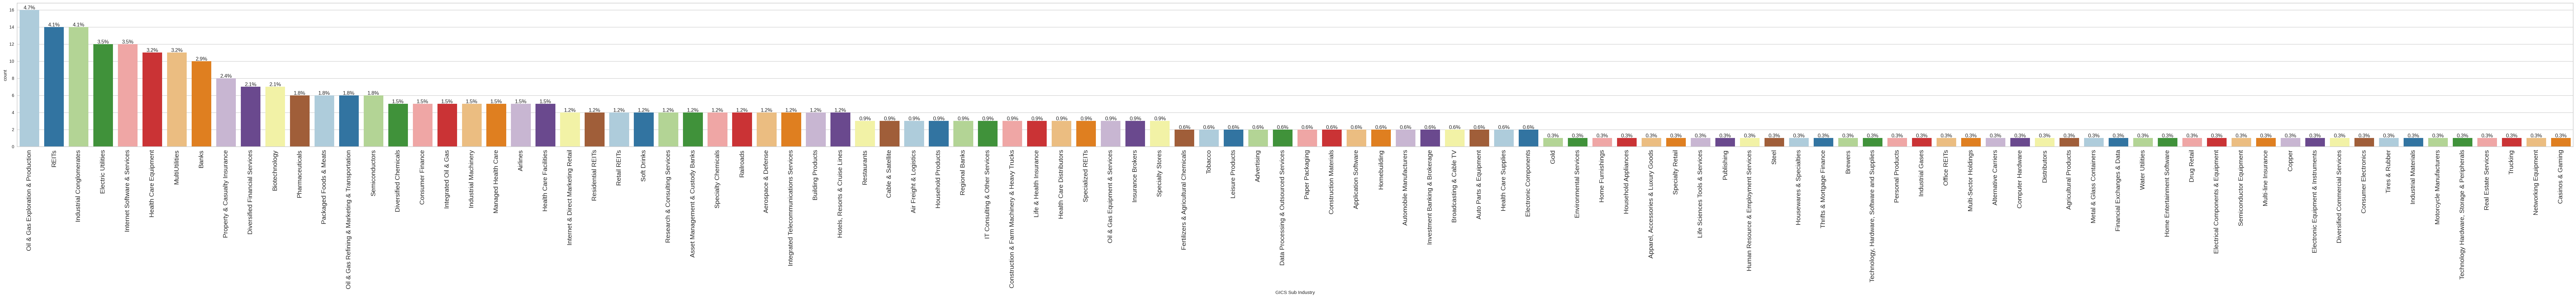

In [ ]:
labeled_barplot(data, "GICS Sub Industry", perc=True)

Oil & Gas Exploration & Production is the commonly occuring sub industry in the dataset

###Current Price

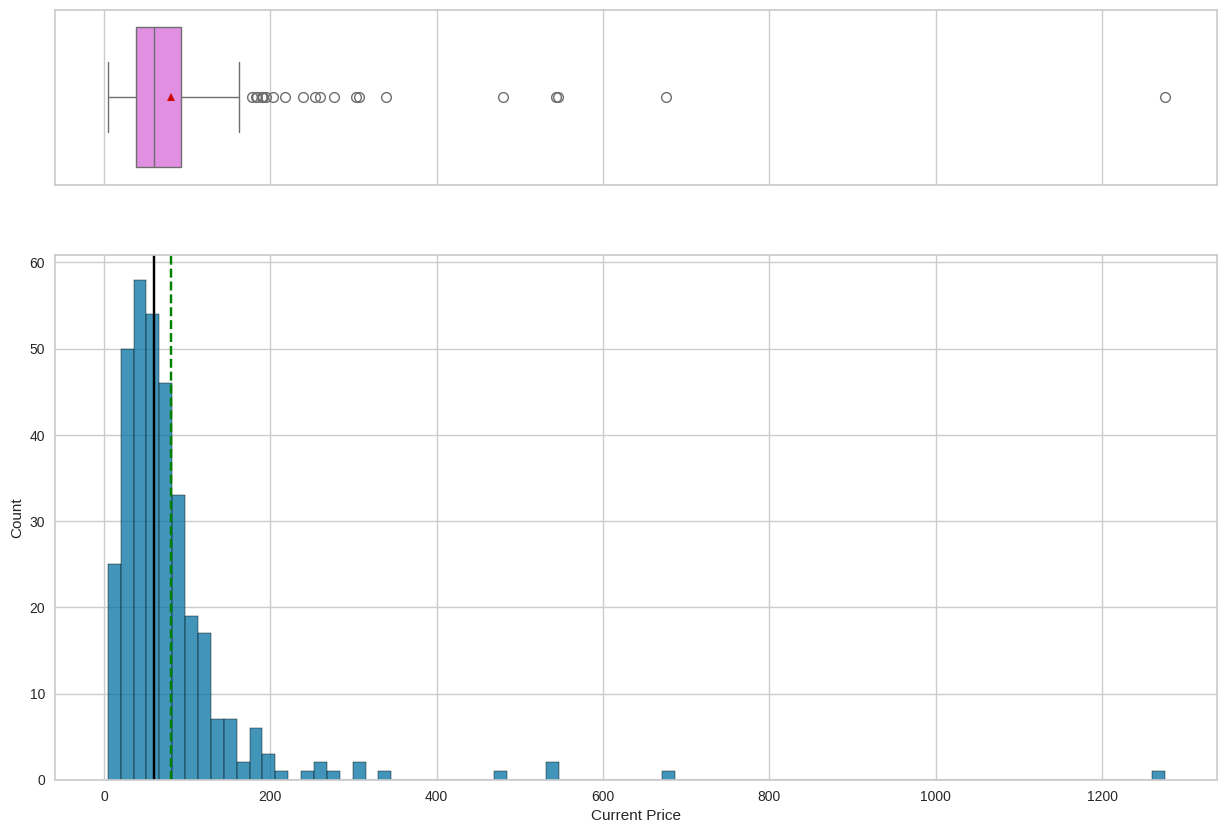

In [ ]:
histogram_boxplot(data, "Current Price")

The current price distribution is skewed to the right with quite a number of outliers and an extreme outlier

###Price Change

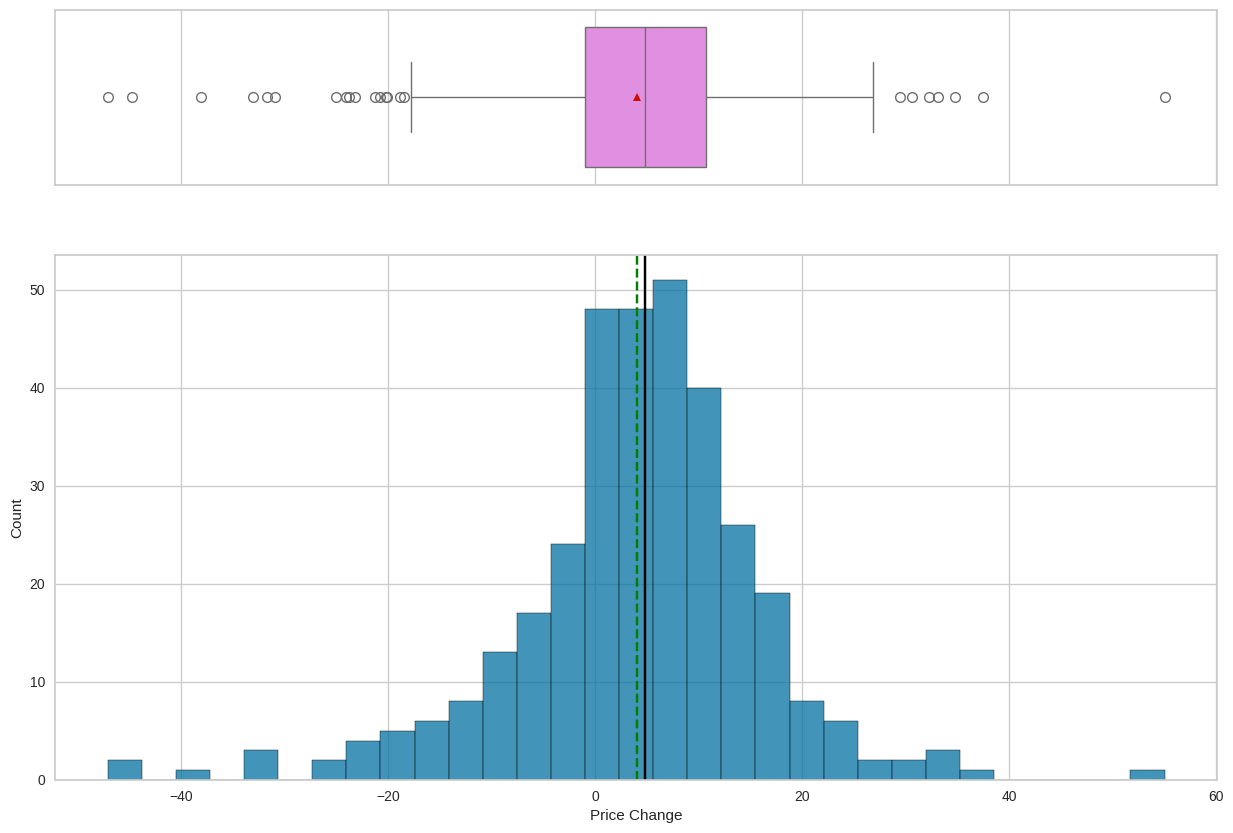

In [ ]:
histogram_boxplot(data, "Price Change")

The price change distribution is fairly normal

###Volatility

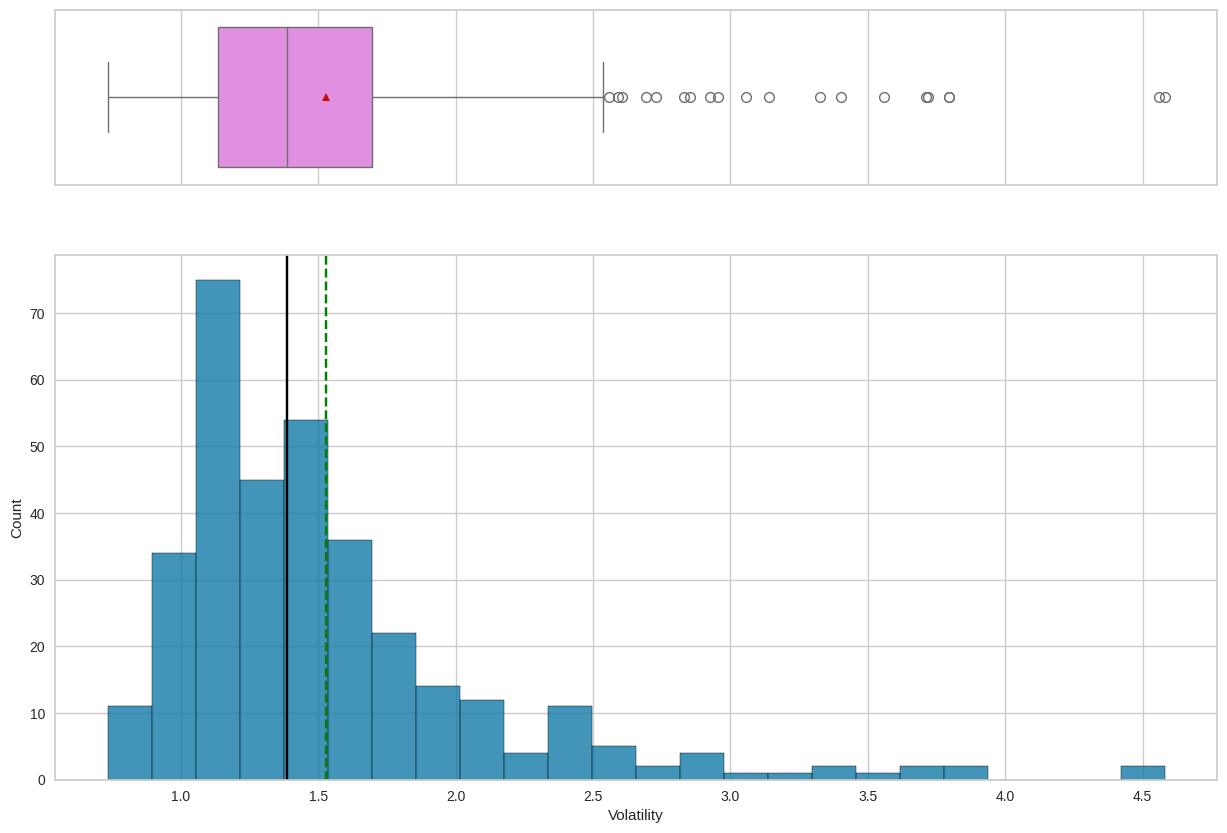

In [ ]:
histogram_boxplot(data, "Volatility")

Volatility distribution is skewed to the right

###ROE

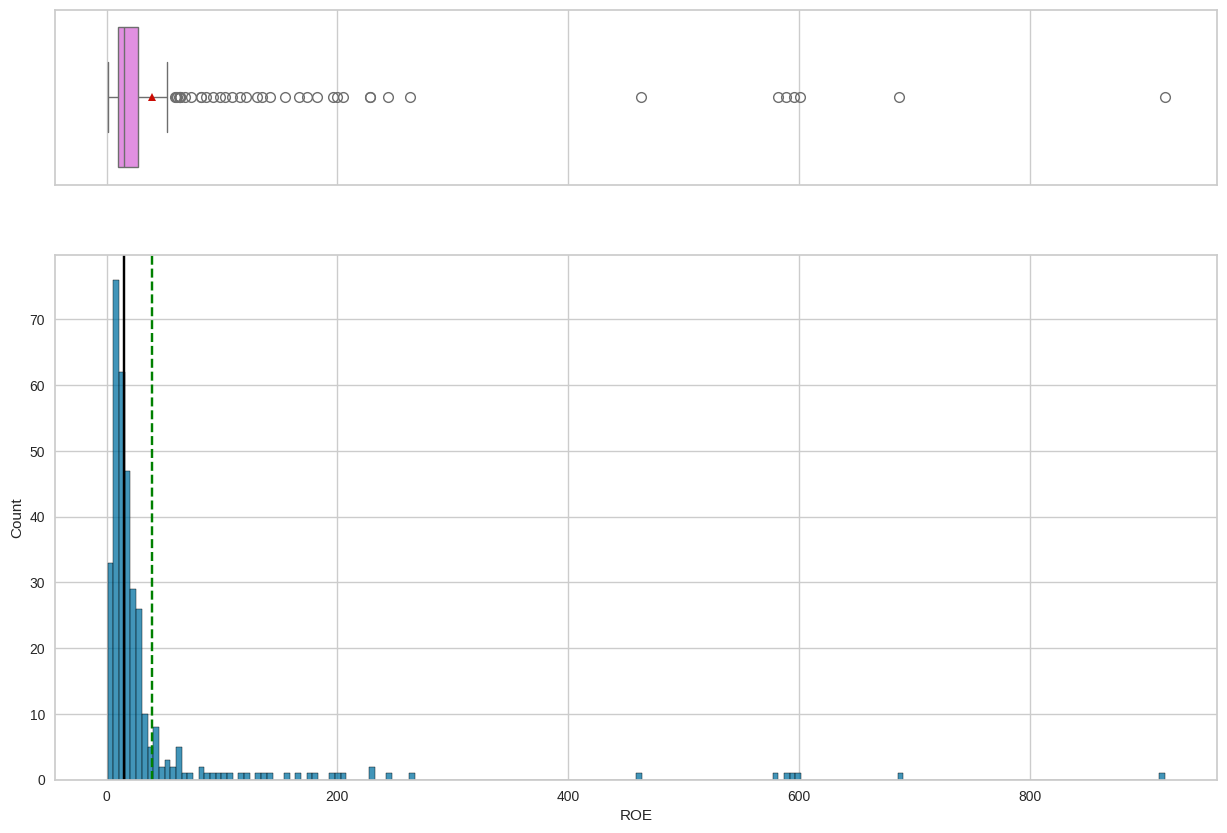

In [ ]:
histogram_boxplot(data, "ROE")

ROE distribution is heavily right skewed

###Cash Ratio

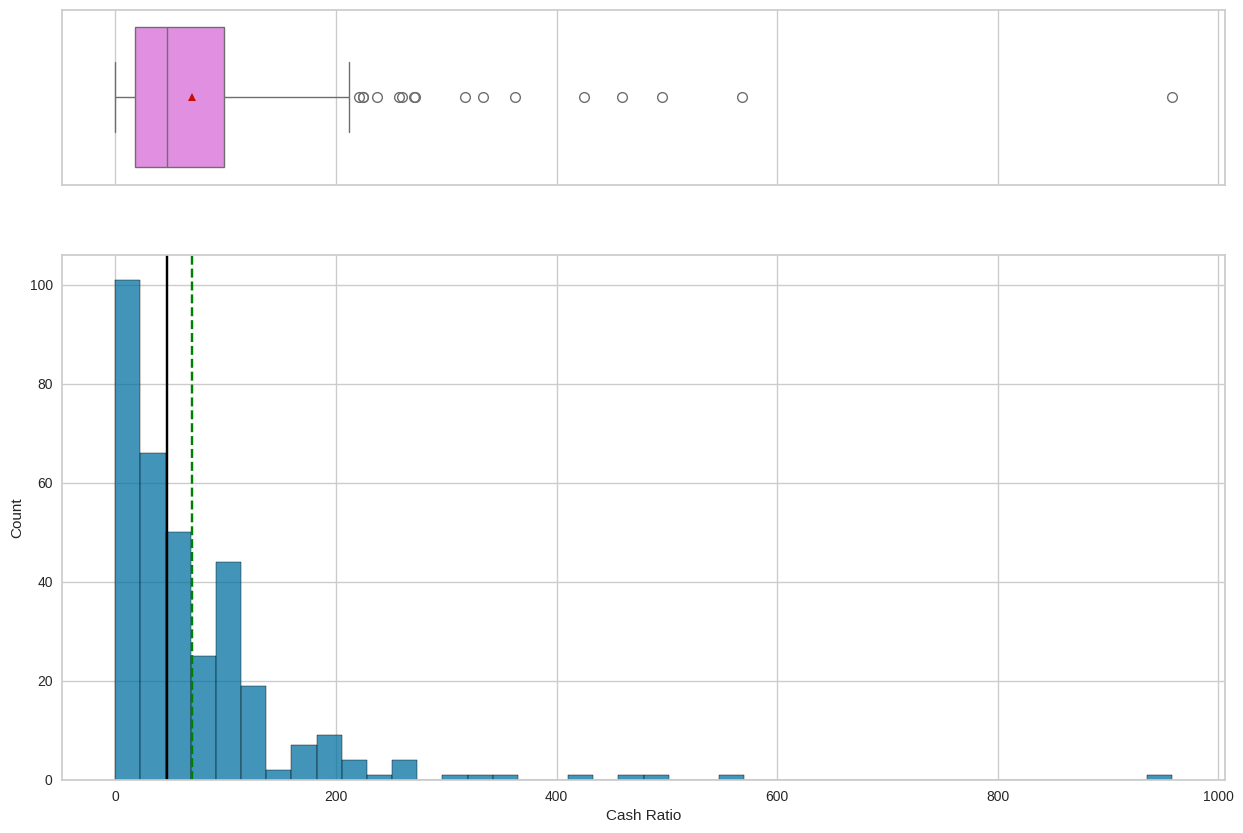

In [ ]:
histogram_boxplot(data, "Cash Ratio")

The distribution of Cash Ratio is right skewed

###Net Cash Flow

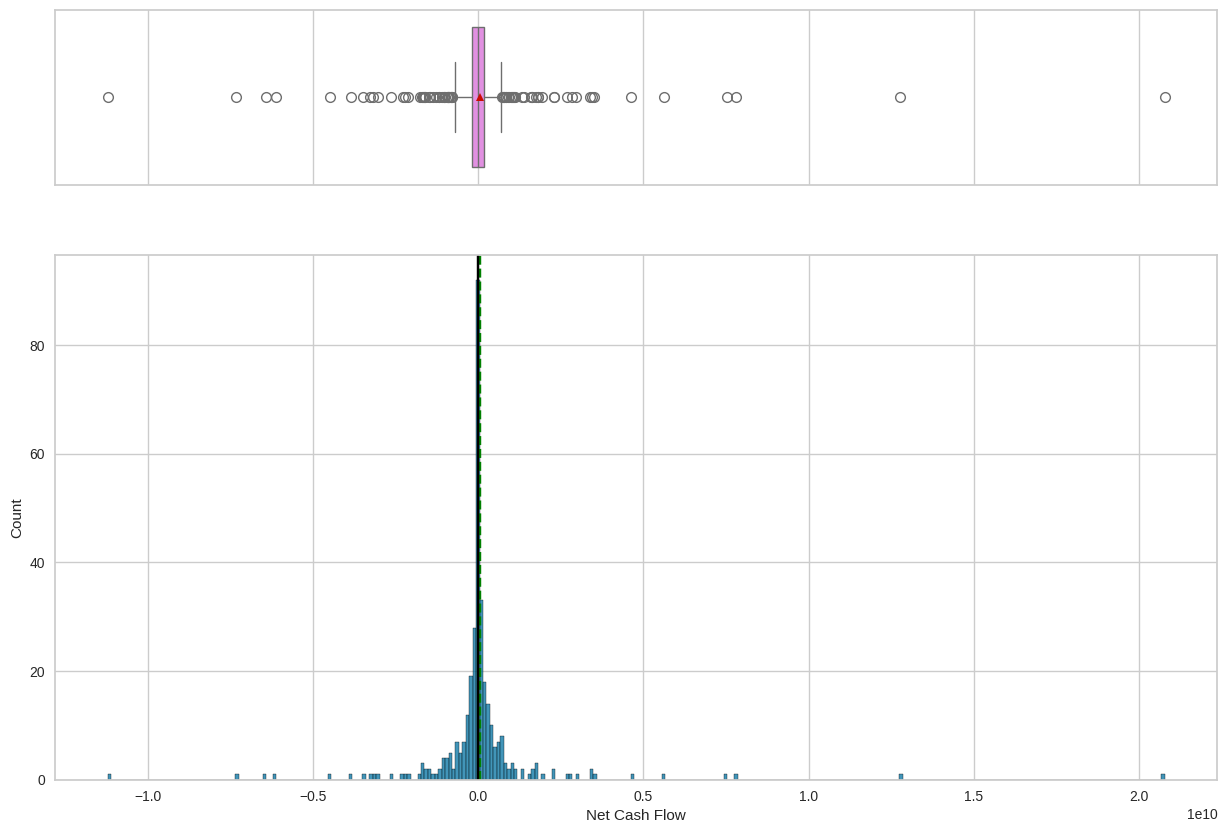

In [ ]:
histogram_boxplot(data, "Net Cash Flow")

Net cash flow distribution is normal

###Net Income

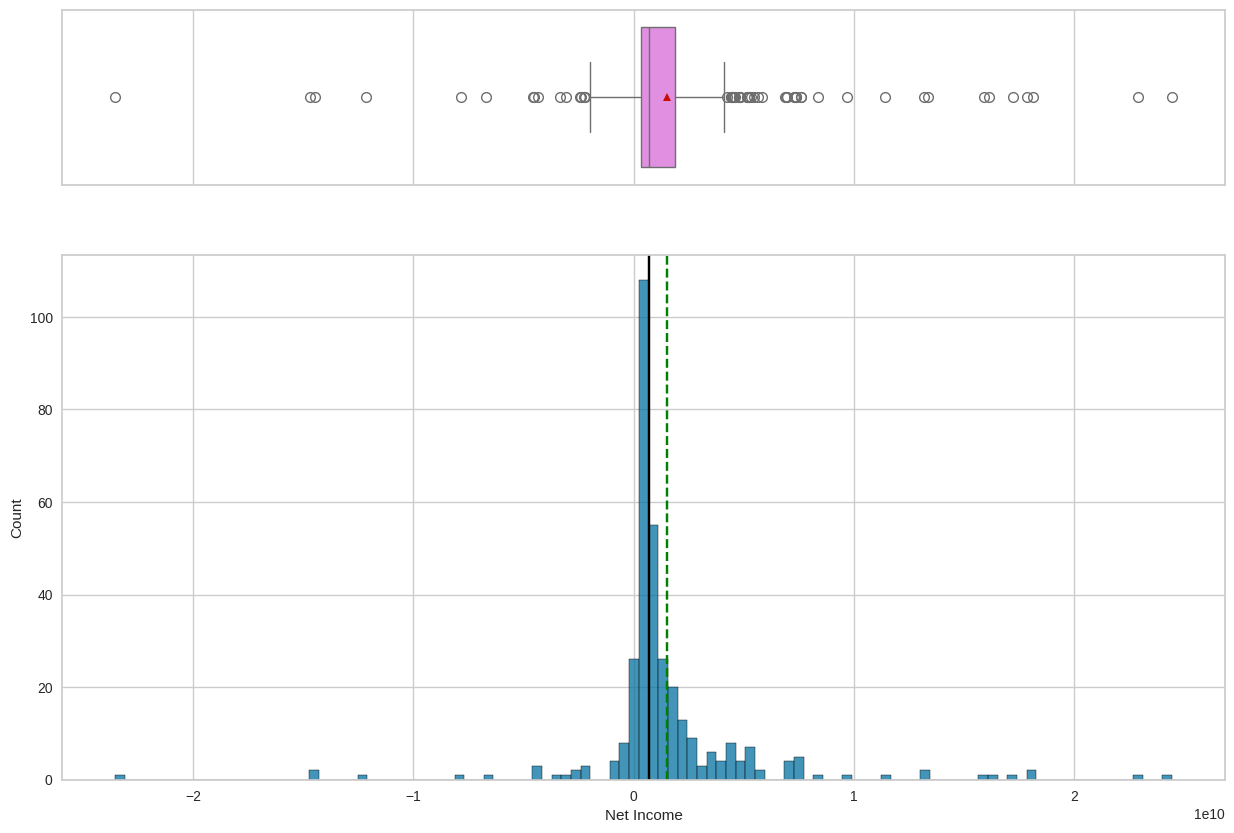

In [ ]:
histogram_boxplot(data, "Net Income")

The net income distribution is slightly right skewed

###Earnings per share

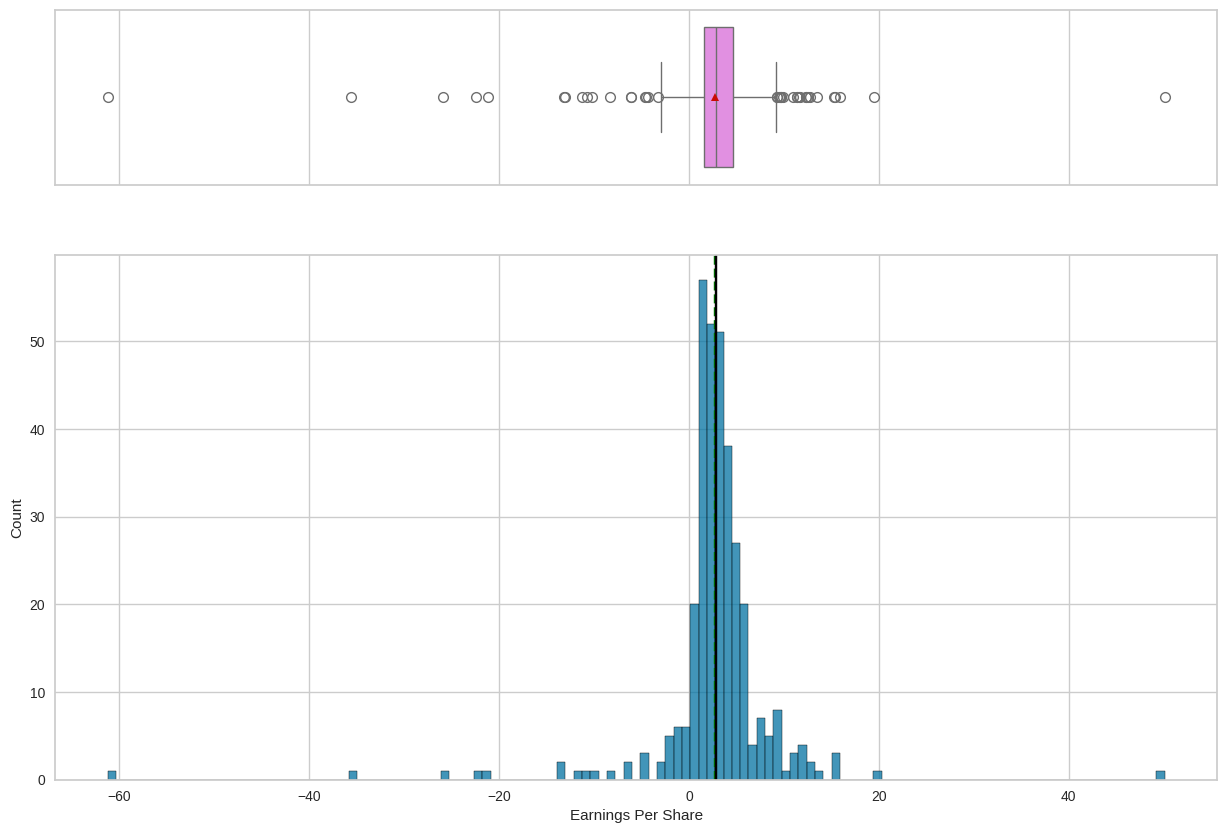

In [ ]:
histogram_boxplot(data, "Earnings Per Share")

The Earnings per share distribution is quite normal

###Estimated Shares Outstanding

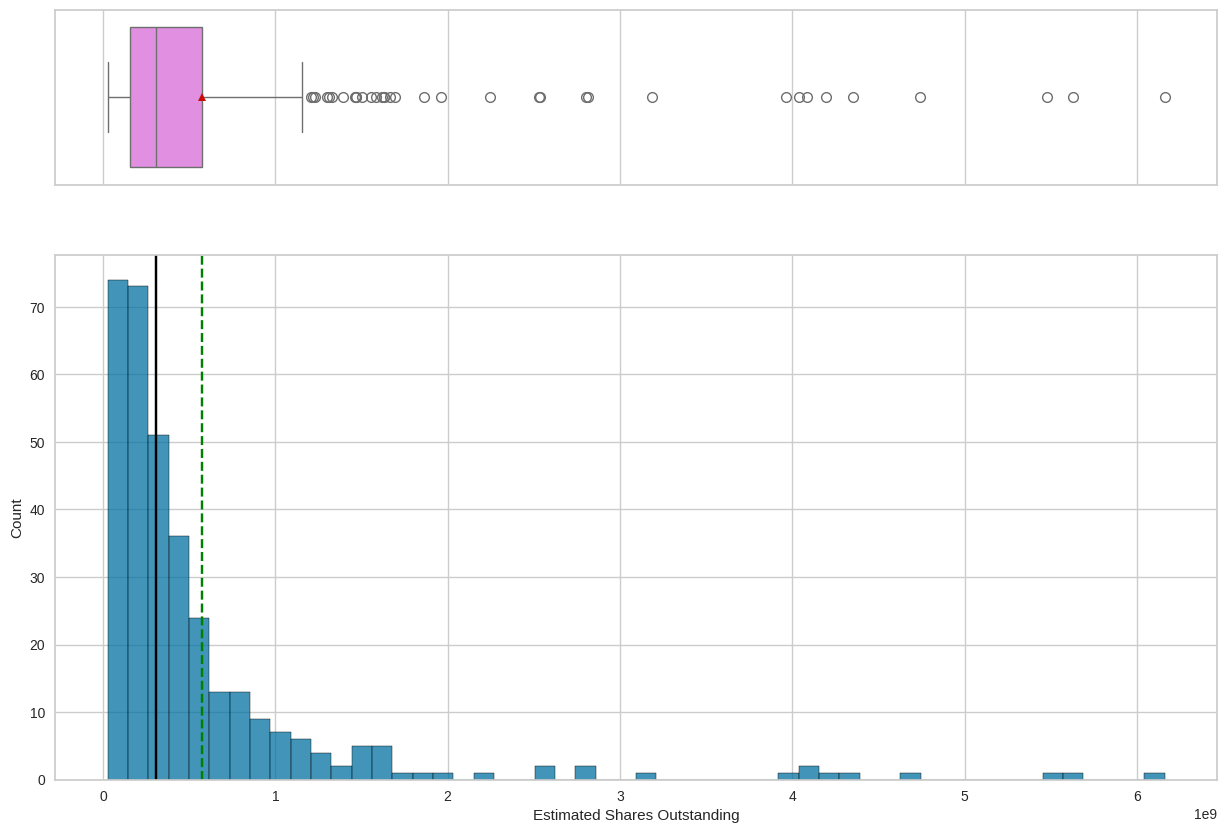

In [ ]:
histogram_boxplot(data, "Estimated Shares Outstanding")

The distribution is right skewed

###P/E Ratio

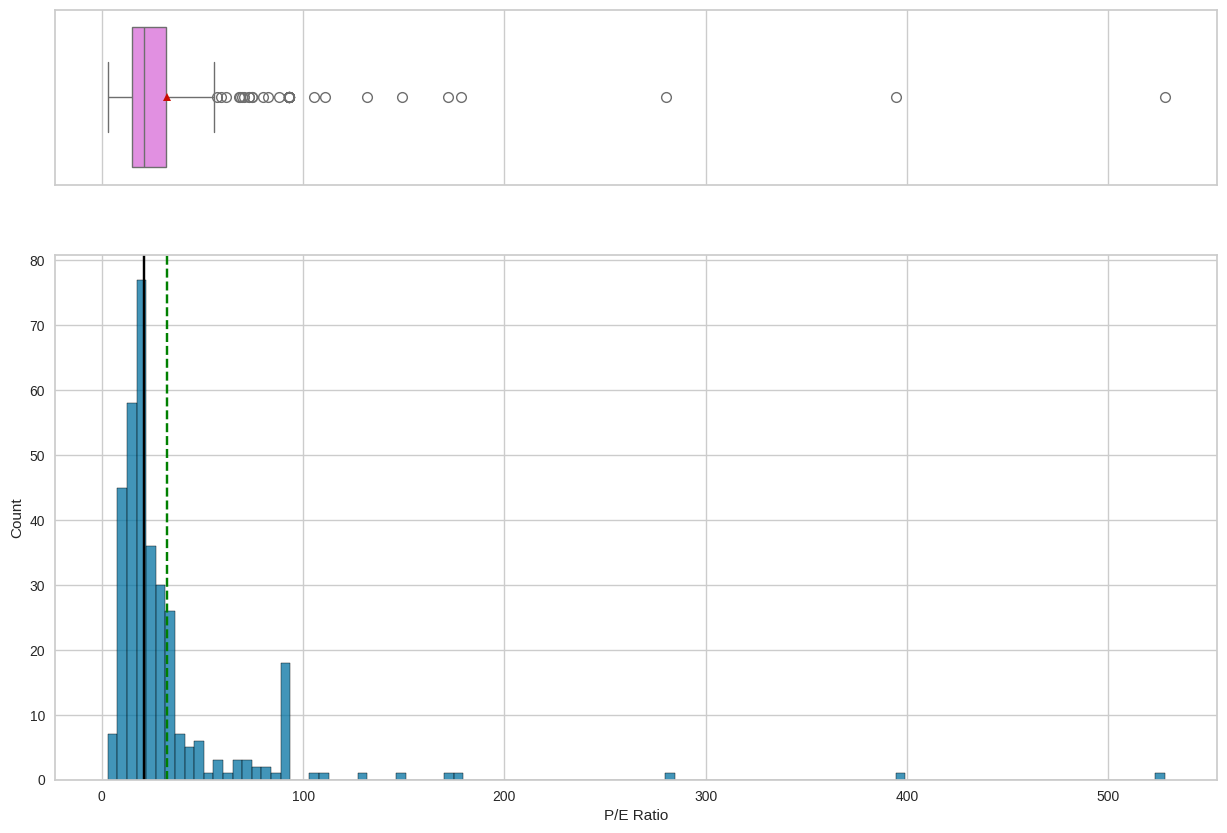

In [ ]:
histogram_boxplot(data, "P/E Ratio")

The P/E ratio distribution is right skewed

###P/B Ratio

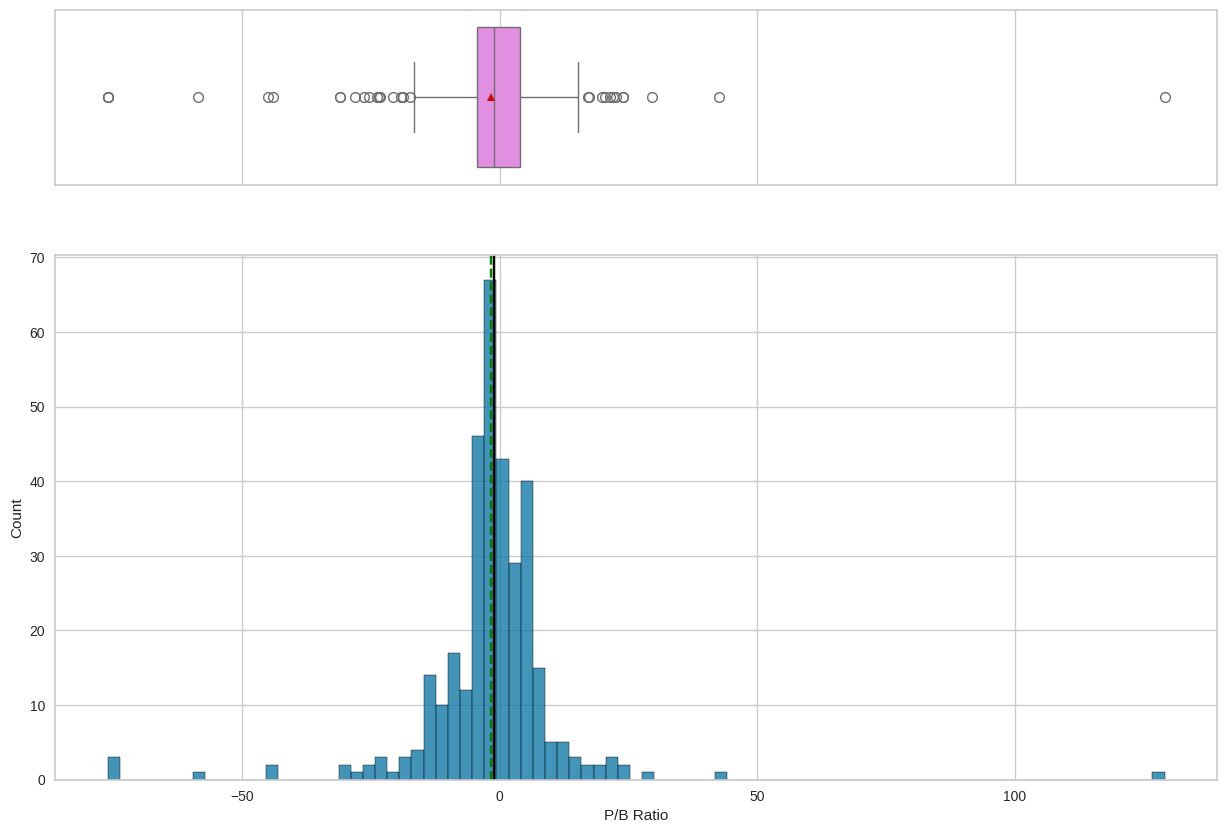

In [ ]:
histogram_boxplot(data, "P/B Ratio")

The distribution of P/B ratio is quite normal


##Bivariate Analysis

###GICS sector vs Price change

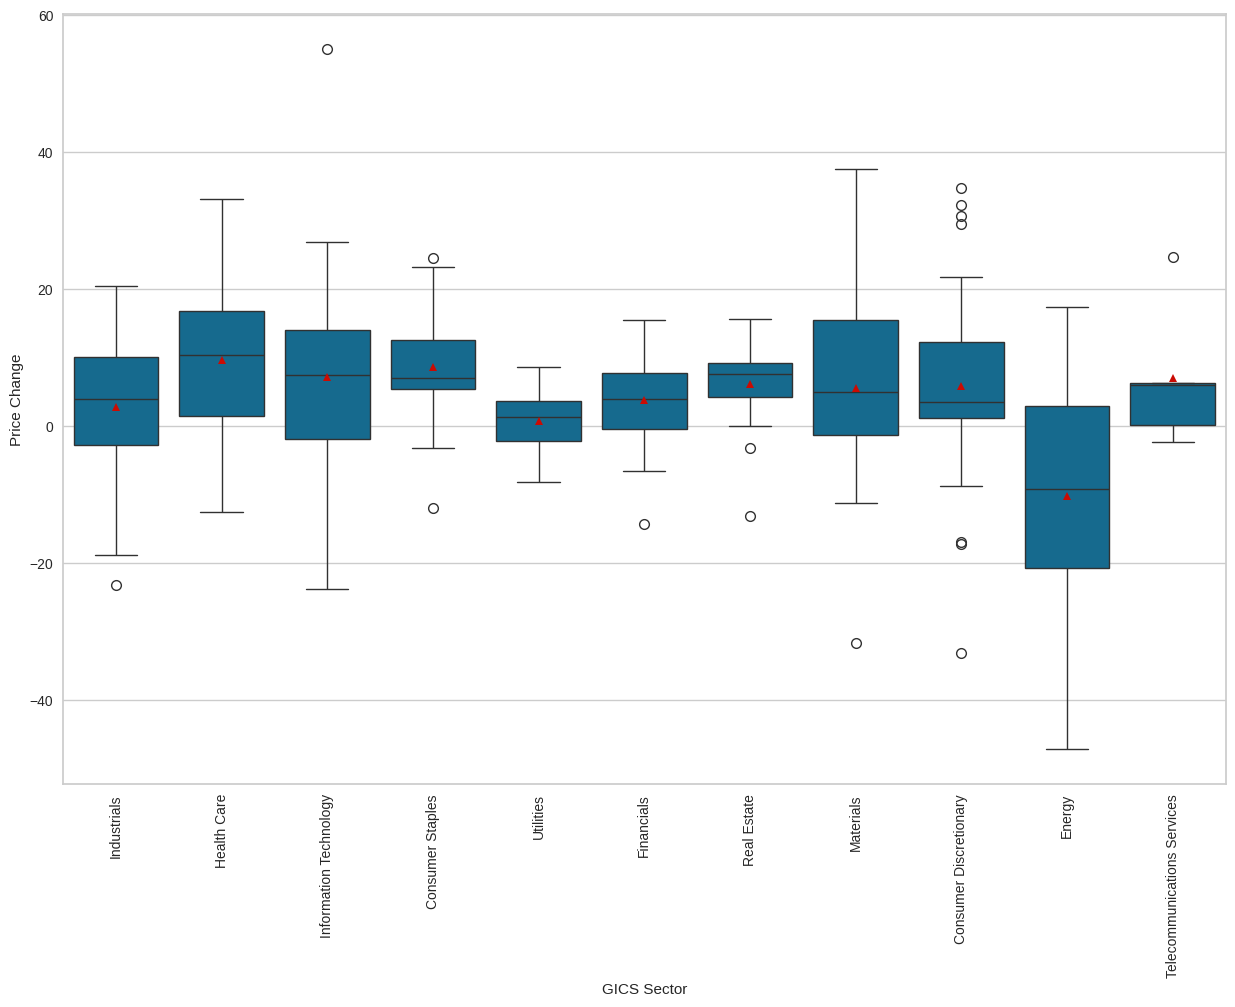

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x="GICS Sector", y="Price Change", showmeans = True)
plt.xticks(rotation=90)
plt.show()

On average, the Health Care sector has the maximum price change while the least is the Energy sector

###GICS vs Cash Ratio

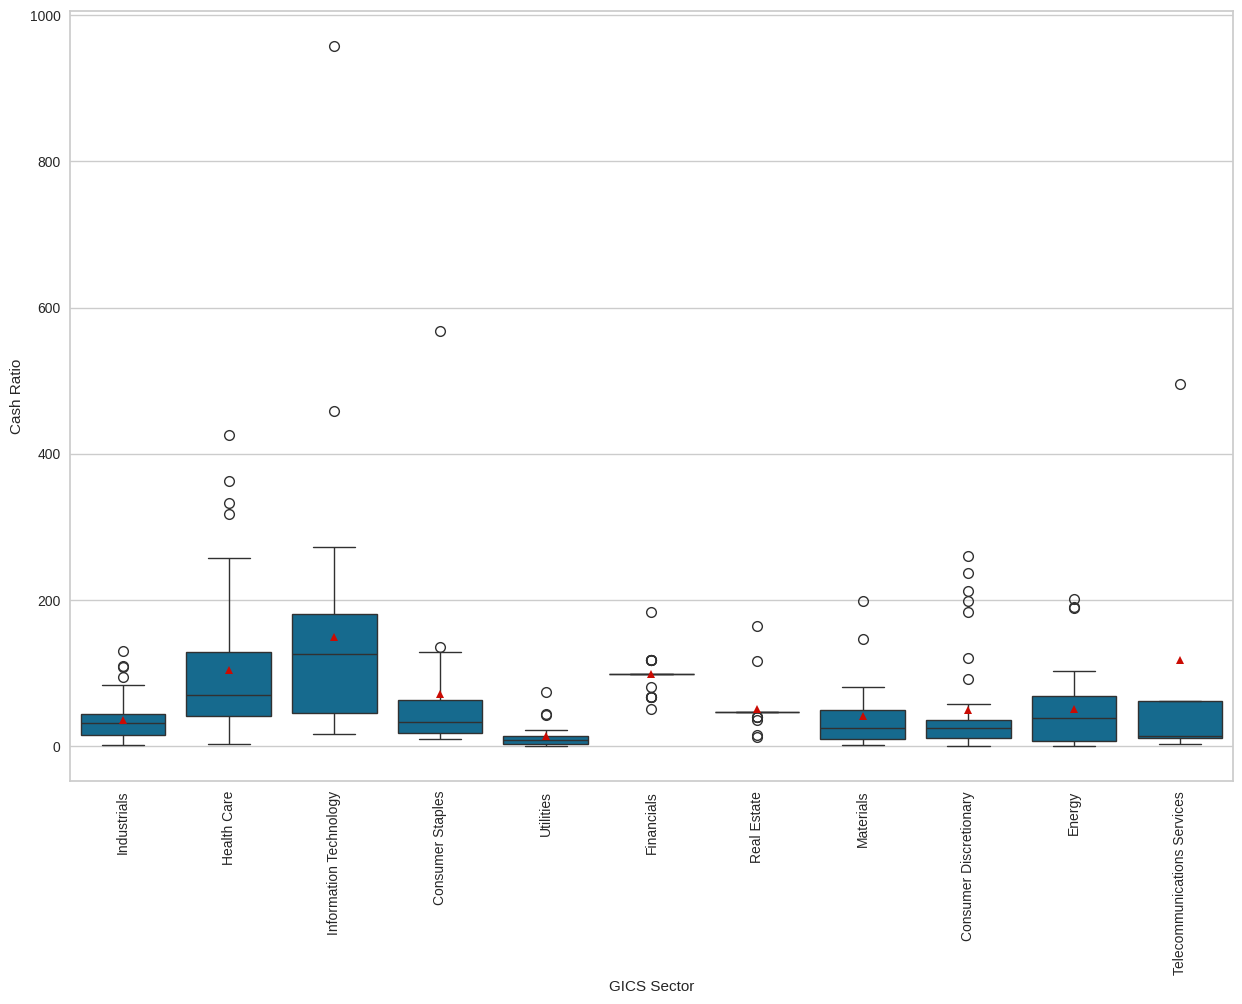

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x="GICS Sector", y="Cash Ratio", showmeans = True)
plt.xticks(rotation=90)
plt.show()

On average, the Information Technology sector has the highest cash ratio and the lowest is in the Utilities sector

###GICS sector vs P/E ratio

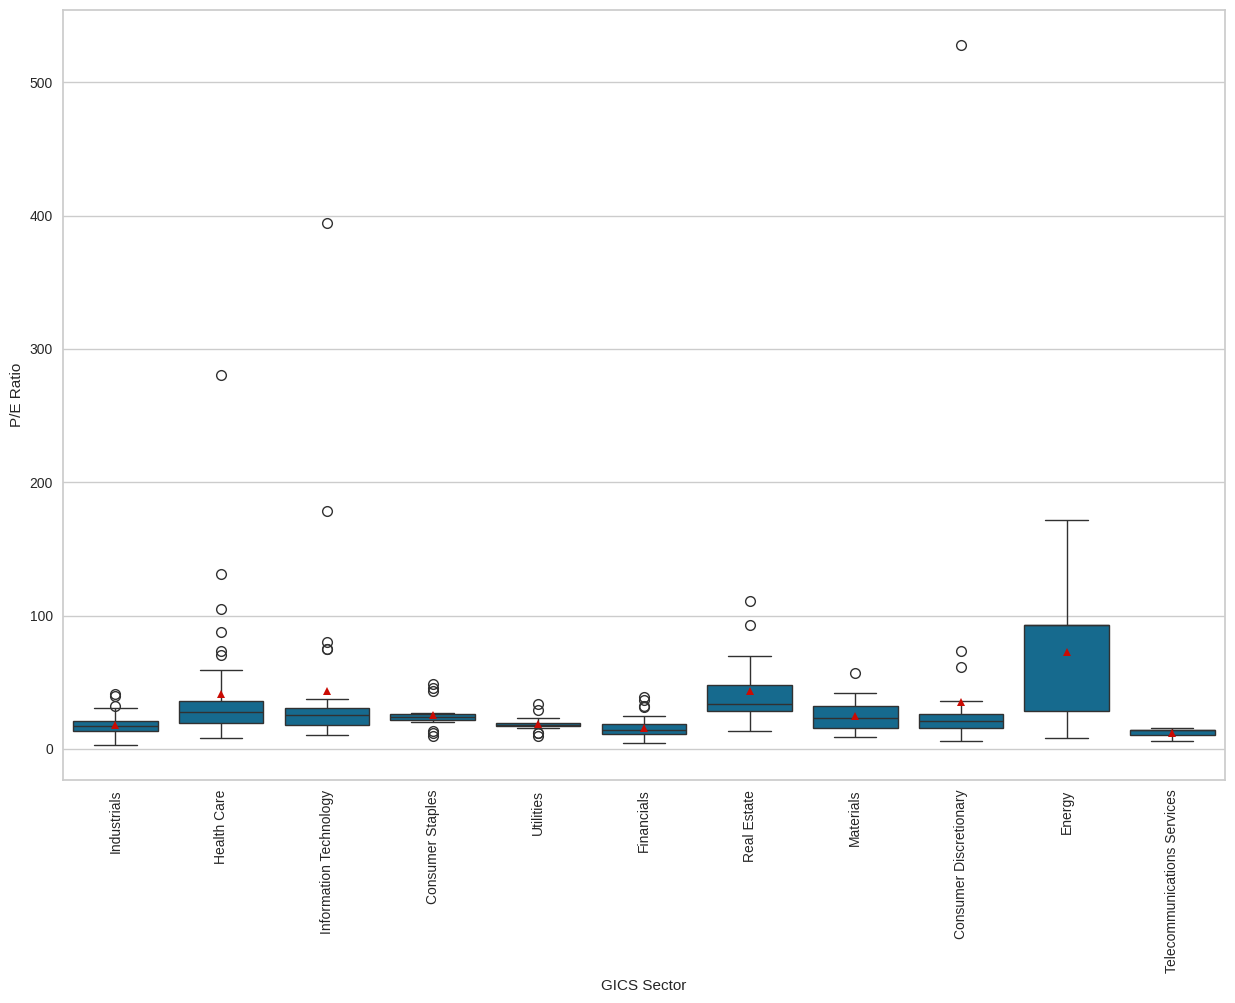

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, x="GICS Sector", y="P/E Ratio", showmeans = True)
plt.xticks(rotation=90)
plt.show()

On average, the Energy sector has the highest P/E ratio

###GICS sector vs Volatility

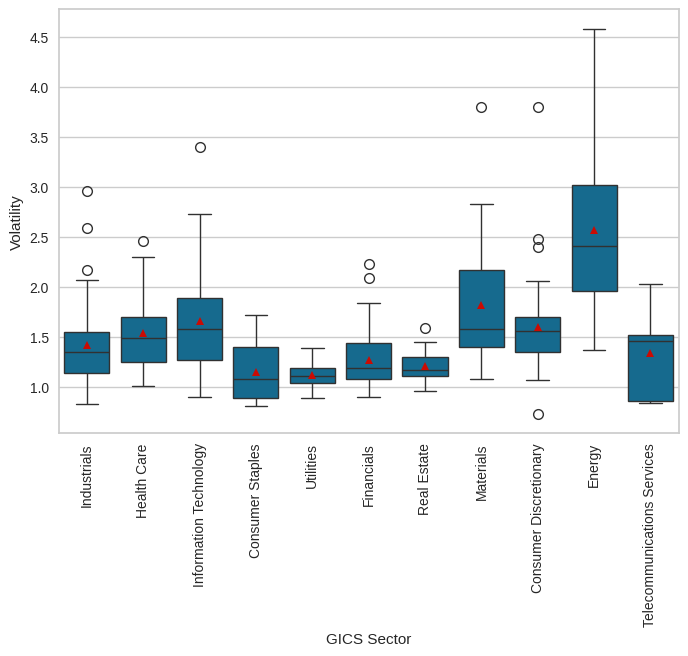

In [ ]:
sns.boxplot(data=data, x="GICS Sector", y="Volatility", showmeans = True)
plt.xticks(rotation=90)
plt.show()

On average, the energy sector has the most volatility of stock price while the Utilities sector has the least

###GICS sector vs ROE

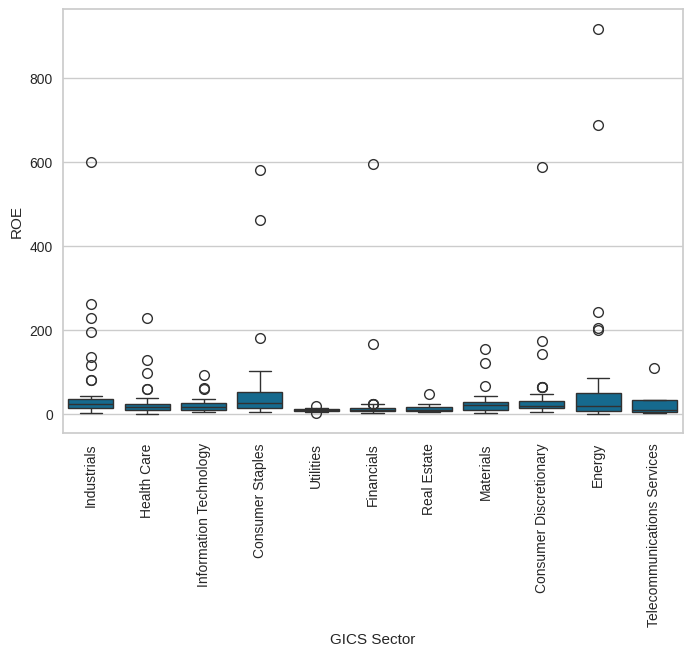

In [ ]:
sns.boxplot(data=data, x="GICS Sector", y="ROE")
plt.xticks(rotation=90)
plt.show()

The ROE of all the sectors are quite close to each other, however on average, the Consumer Staples sector has the highest on average

###GICS sector vs Net cash flow

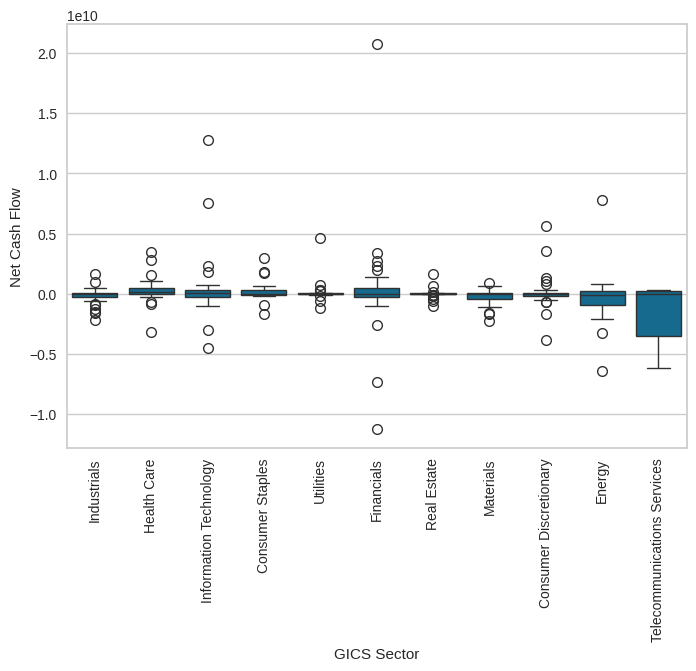

In [ ]:
sns.boxplot(data=data, x="GICS Sector", y="Net Cash Flow")
plt.xticks(rotation=90)
plt.show()

On average, the net cash flow for all the sectors is zero. Also, the distribution shows that all the sectors experienced positive and negative cash flows

###GICS sector vs Net Income

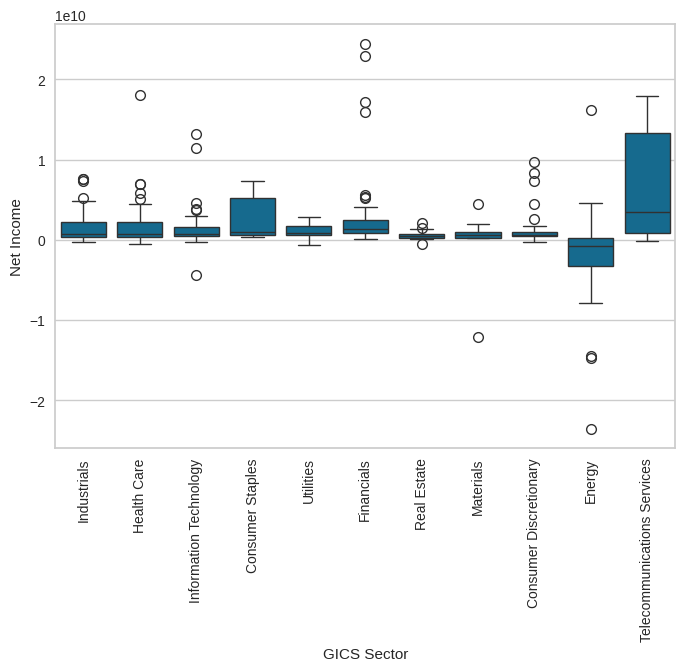

In [ ]:
sns.boxplot(data=data, x="GICS Sector", y="Net Income")
plt.xticks(rotation=90)
plt.show()

On average, the Telecommunication services sector has the highest net income while the energy sector has the lowest

###GICS sector vs Earnings per share

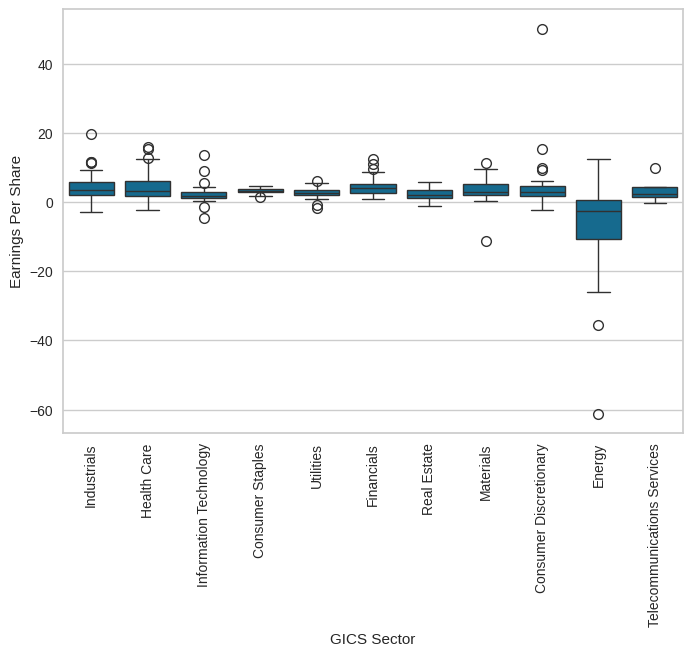

In [ ]:
sns.boxplot(data=data, x="GICS Sector", y="Earnings Per Share")
plt.xticks(rotation=90)
plt.show()

The energy sector has the least earnings per share, on average

###GICS vs Estimated shares outstanding

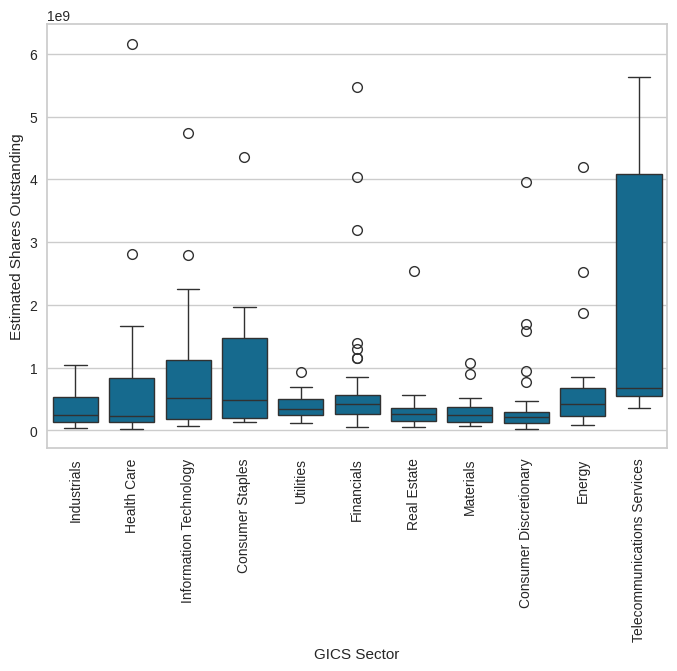

In [ ]:
sns.boxplot(data=data, x="GICS Sector", y="Estimated Shares Outstanding")
plt.xticks(rotation=90)
plt.show()

On average, the telecommunications sector has the highest estimated shares outstanding

###GICS vs P/B ratio

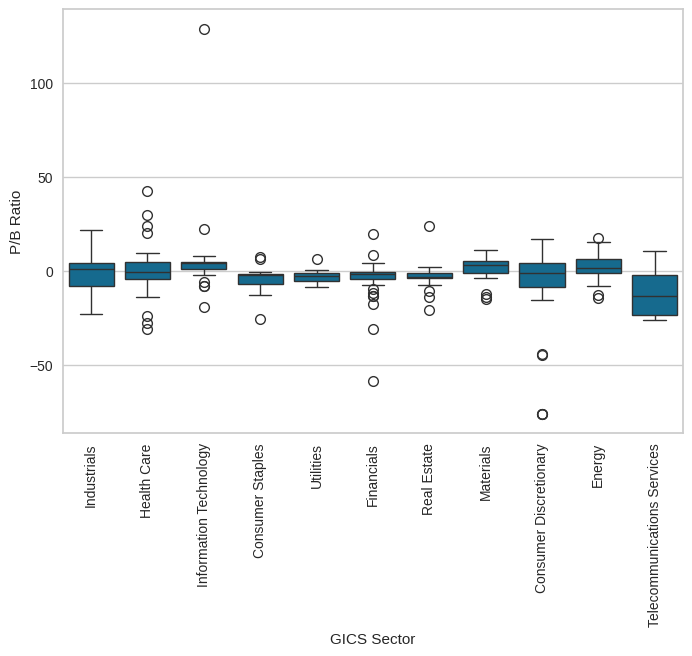

In [ ]:
sns.boxplot(data=data, x="GICS Sector", y="P/B Ratio")
plt.xticks(rotation=90)
plt.show()

On average, the telecommunications sector has the lowest P/B ratio

###Correlation check

<Axes: >

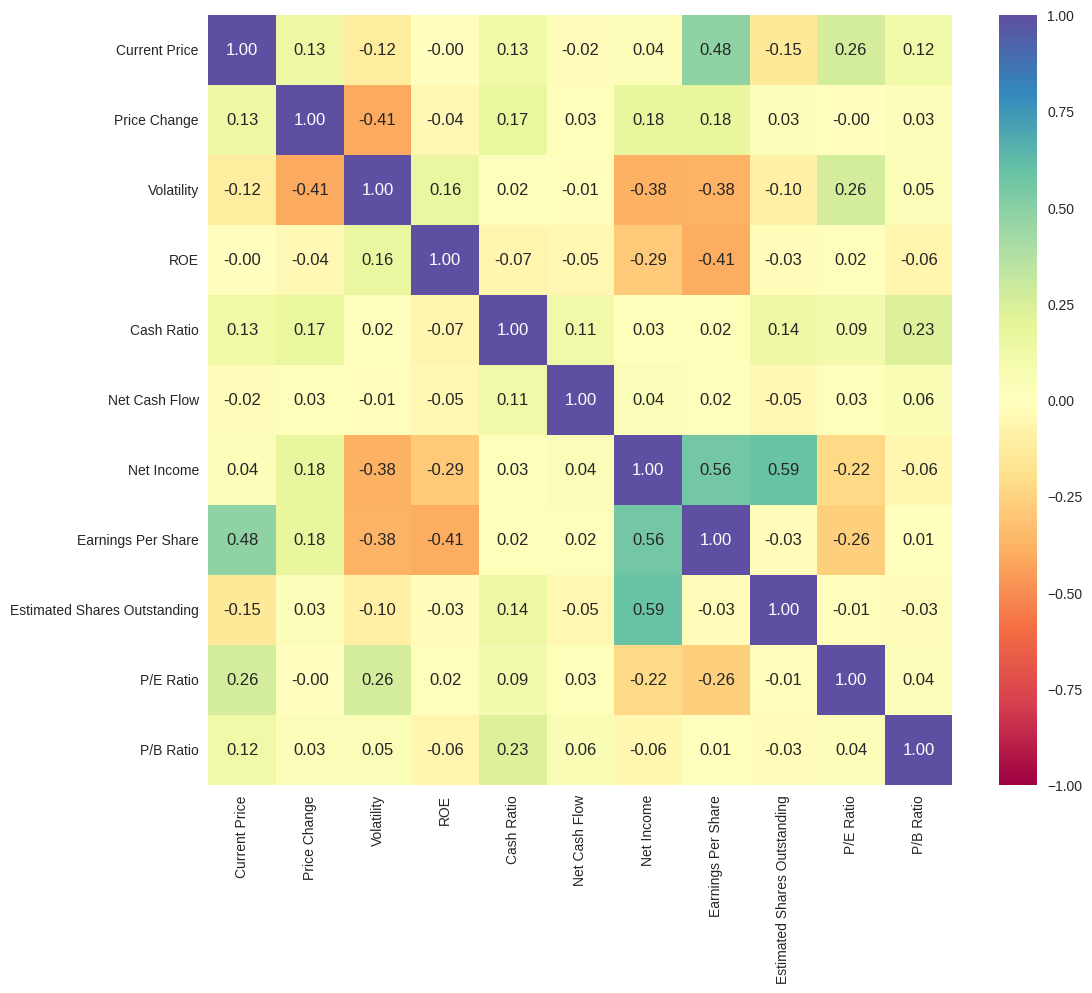

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12,10))
sns.heatmap(data[num_cols].corr(), annot=True, vmin = -1, vmax = 1, fmt = ".2f", cmap="Spectral")


Net income is moderately positively correlated with Earnings per share and Estimated shares outstanding

Earnings per share is moderately positively correlated with Current price

Volatility and Price Change are moderately negatively correlated

ROE and Earnings per share are moderately negatively correlated





## Data Preprocessing


###Scaling the data

In [ ]:
#scaling the data
scaler = StandardScaler()
subset = data[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
#creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

In [ ]:
#creating a copy of the scaled data
kmeans_df = subset_scaled_df.copy()

###Creating an elbow plot

Number of Clusters: 1 Average Distortion: 2.5425069919221697
Number of Clusters: 2 Average Distortion: 2.382318498894466
Number of Clusters: 3 Average Distortion: 2.2692367155390745
Number of Clusters: 4 Average Distortion: 2.207819625980058
Number of Clusters: 5 Average Distortion: 2.1240741476529146
Number of Clusters: 6 Average Distortion: 2.0591390368681237
Number of Clusters: 7 Average Distortion: 2.0339532074667974
Number of Clusters: 8 Average Distortion: 1.9899408536298782
Number of Clusters: 9 Average Distortion: 1.901284383100173


Text(0.5, 1.0, 'Selecting the number of clusters with the Elbow Method')

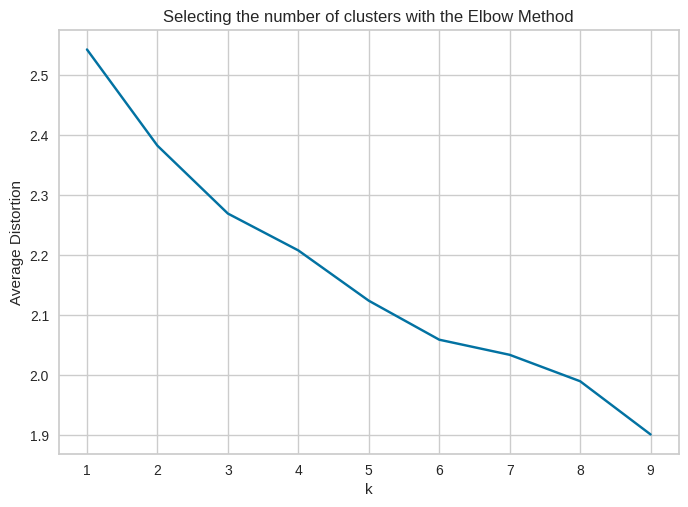

In [ ]:
clusters = range (1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(kmeans_df)
    prediction = model.predict(kmeans_df)
    distortion = (
        sum(
            np.min(cdist(kmeans_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / kmeans_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "Average Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting the number of clusters with the Elbow Method")

From the elbow curve, it's hard to tell but 4 or 5 seem to be an appropriate value

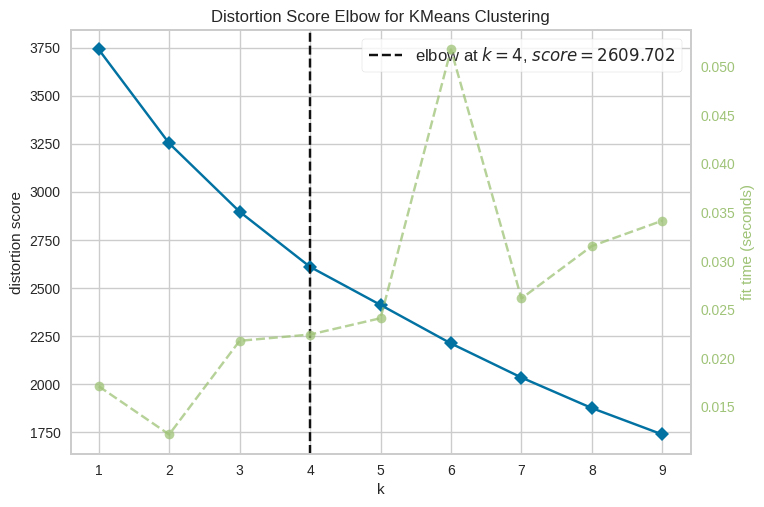

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=True)
visualizer.fit(kmeans_df)
visualizer.show()

###Checking Silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457
For n_clusters = 3, the silhouette score is 0.4644405674779404
For n_clusters = 4, the silhouette score is 0.4577225970476733
For n_clusters = 5, the silhouette score is 0.40219273904880043
For n_clusters = 6, the silhouette score is 0.4105617151682673
For n_clusters = 7, the silhouette score is 0.38105087369742097
For n_clusters = 8, the silhouette score is 0.38901136394676544
For n_clusters = 9, the silhouette score is 0.4199509372476413


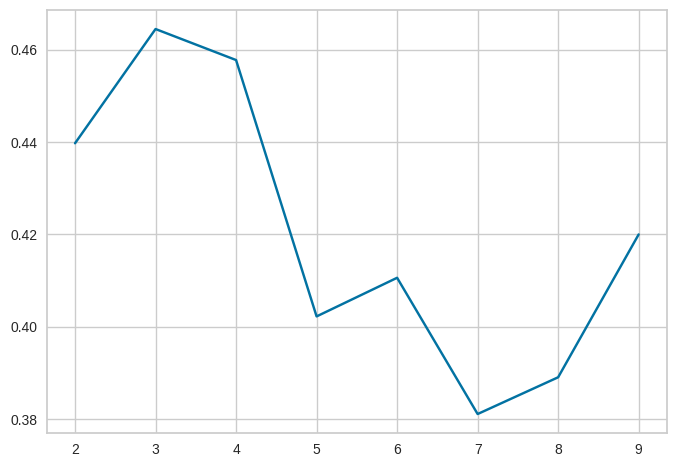

In [ ]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters = n_clusters)
    preds = clusterer.fit_predict((kmeans_df))
    score = silhouette_score(kmeans_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

From the silhouette score, 3 & 4 seem to be a good value

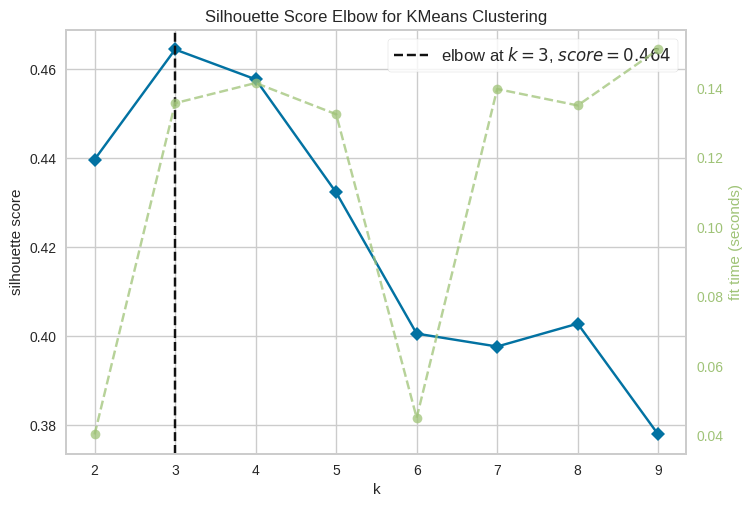

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(kmeans_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

###Finding the optimal number of clusters with the silhouette coefficients

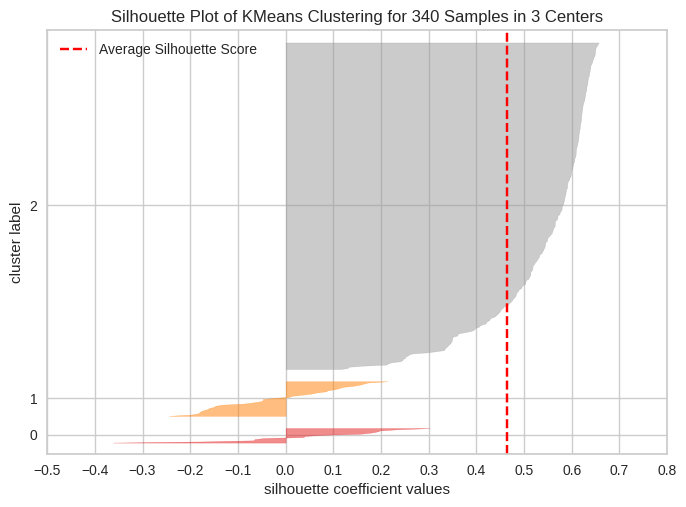

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(kmeans_df)
visualizer.show()

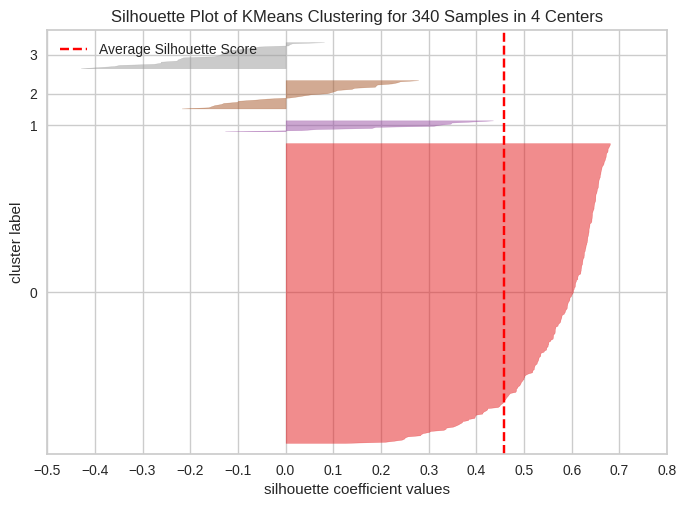

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(kmeans_df)
visualizer.show()

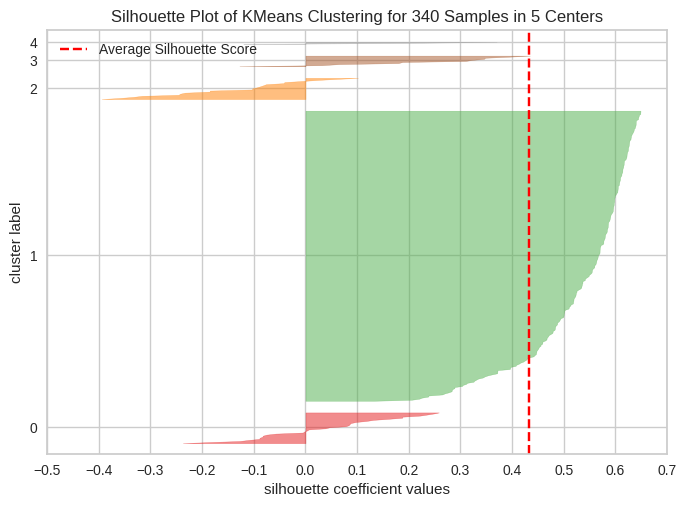

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(kmeans_df)
visualizer.show()

All number of clusters have negative silhouette coefficient values.

The number of clusters to be chosen will be 4 because from the elbow method graph, 4 seems to be a good value and it has a high enough silhoutte score

###Final Model

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(kmeans_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
#making a copy of the original dataframe
df1 = data.copy()

In [ ]:
#adding cluster labels to the original and scaled data
kmeans_df["Kmeans_segment"] = kmeans.labels_
df1["Kmeans_segment"] = kmeans.labels_

###Cluster Profiling

In [ ]:
#grouping the clusters and the getting the means of numeric attributes
cluster_profile = df1.groupby("Kmeans_segment").mean(numeric_only=True)

In [ ]:
cluster_profile["count_in_each_segment"] = df1.groupby("Kmeans_segment")["Security"].count().values

In [ ]:
#displaying the cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
Kmeans_segment,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


On Average:

Cluster 3 has the maximum Current Price, Price change, Cash Ratio, Net Cash flow, Earnings per share and P/B ratio

Cluster 2 has the maximum Volatility, ROE, P/E ratio

Cluster 1 has the maximum Net income and Estimated Shares Outstanding

Cluster 0 has the highest number of data points

####Companies in each cluster

In [ ]:
for cl in df1["Kmeans_segment"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["Kmeans_segment"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [ ]:
df1.groupby(["Kmeans_segment", "GICS Sector"])['Security'].count()

Kmeans_segment  GICS Sector                
0               Consumer Discretionary         33
                Consumer Staples               17
                Energy                          6
                Financials                     45
                Health Care                    29
                Industrials                    52
                Information Technology         24
                Materials                      19
                Real Estate                    26
                Telecommunications Services     2
                Utilities                      24
1               Consumer Discretionary          1
                Consumer Staples                1
                Energy                          1
                Financials                      3
                Health Care                     2
                Information Technology          1
                Telecommunications Services     2
2               Energy                         22
      

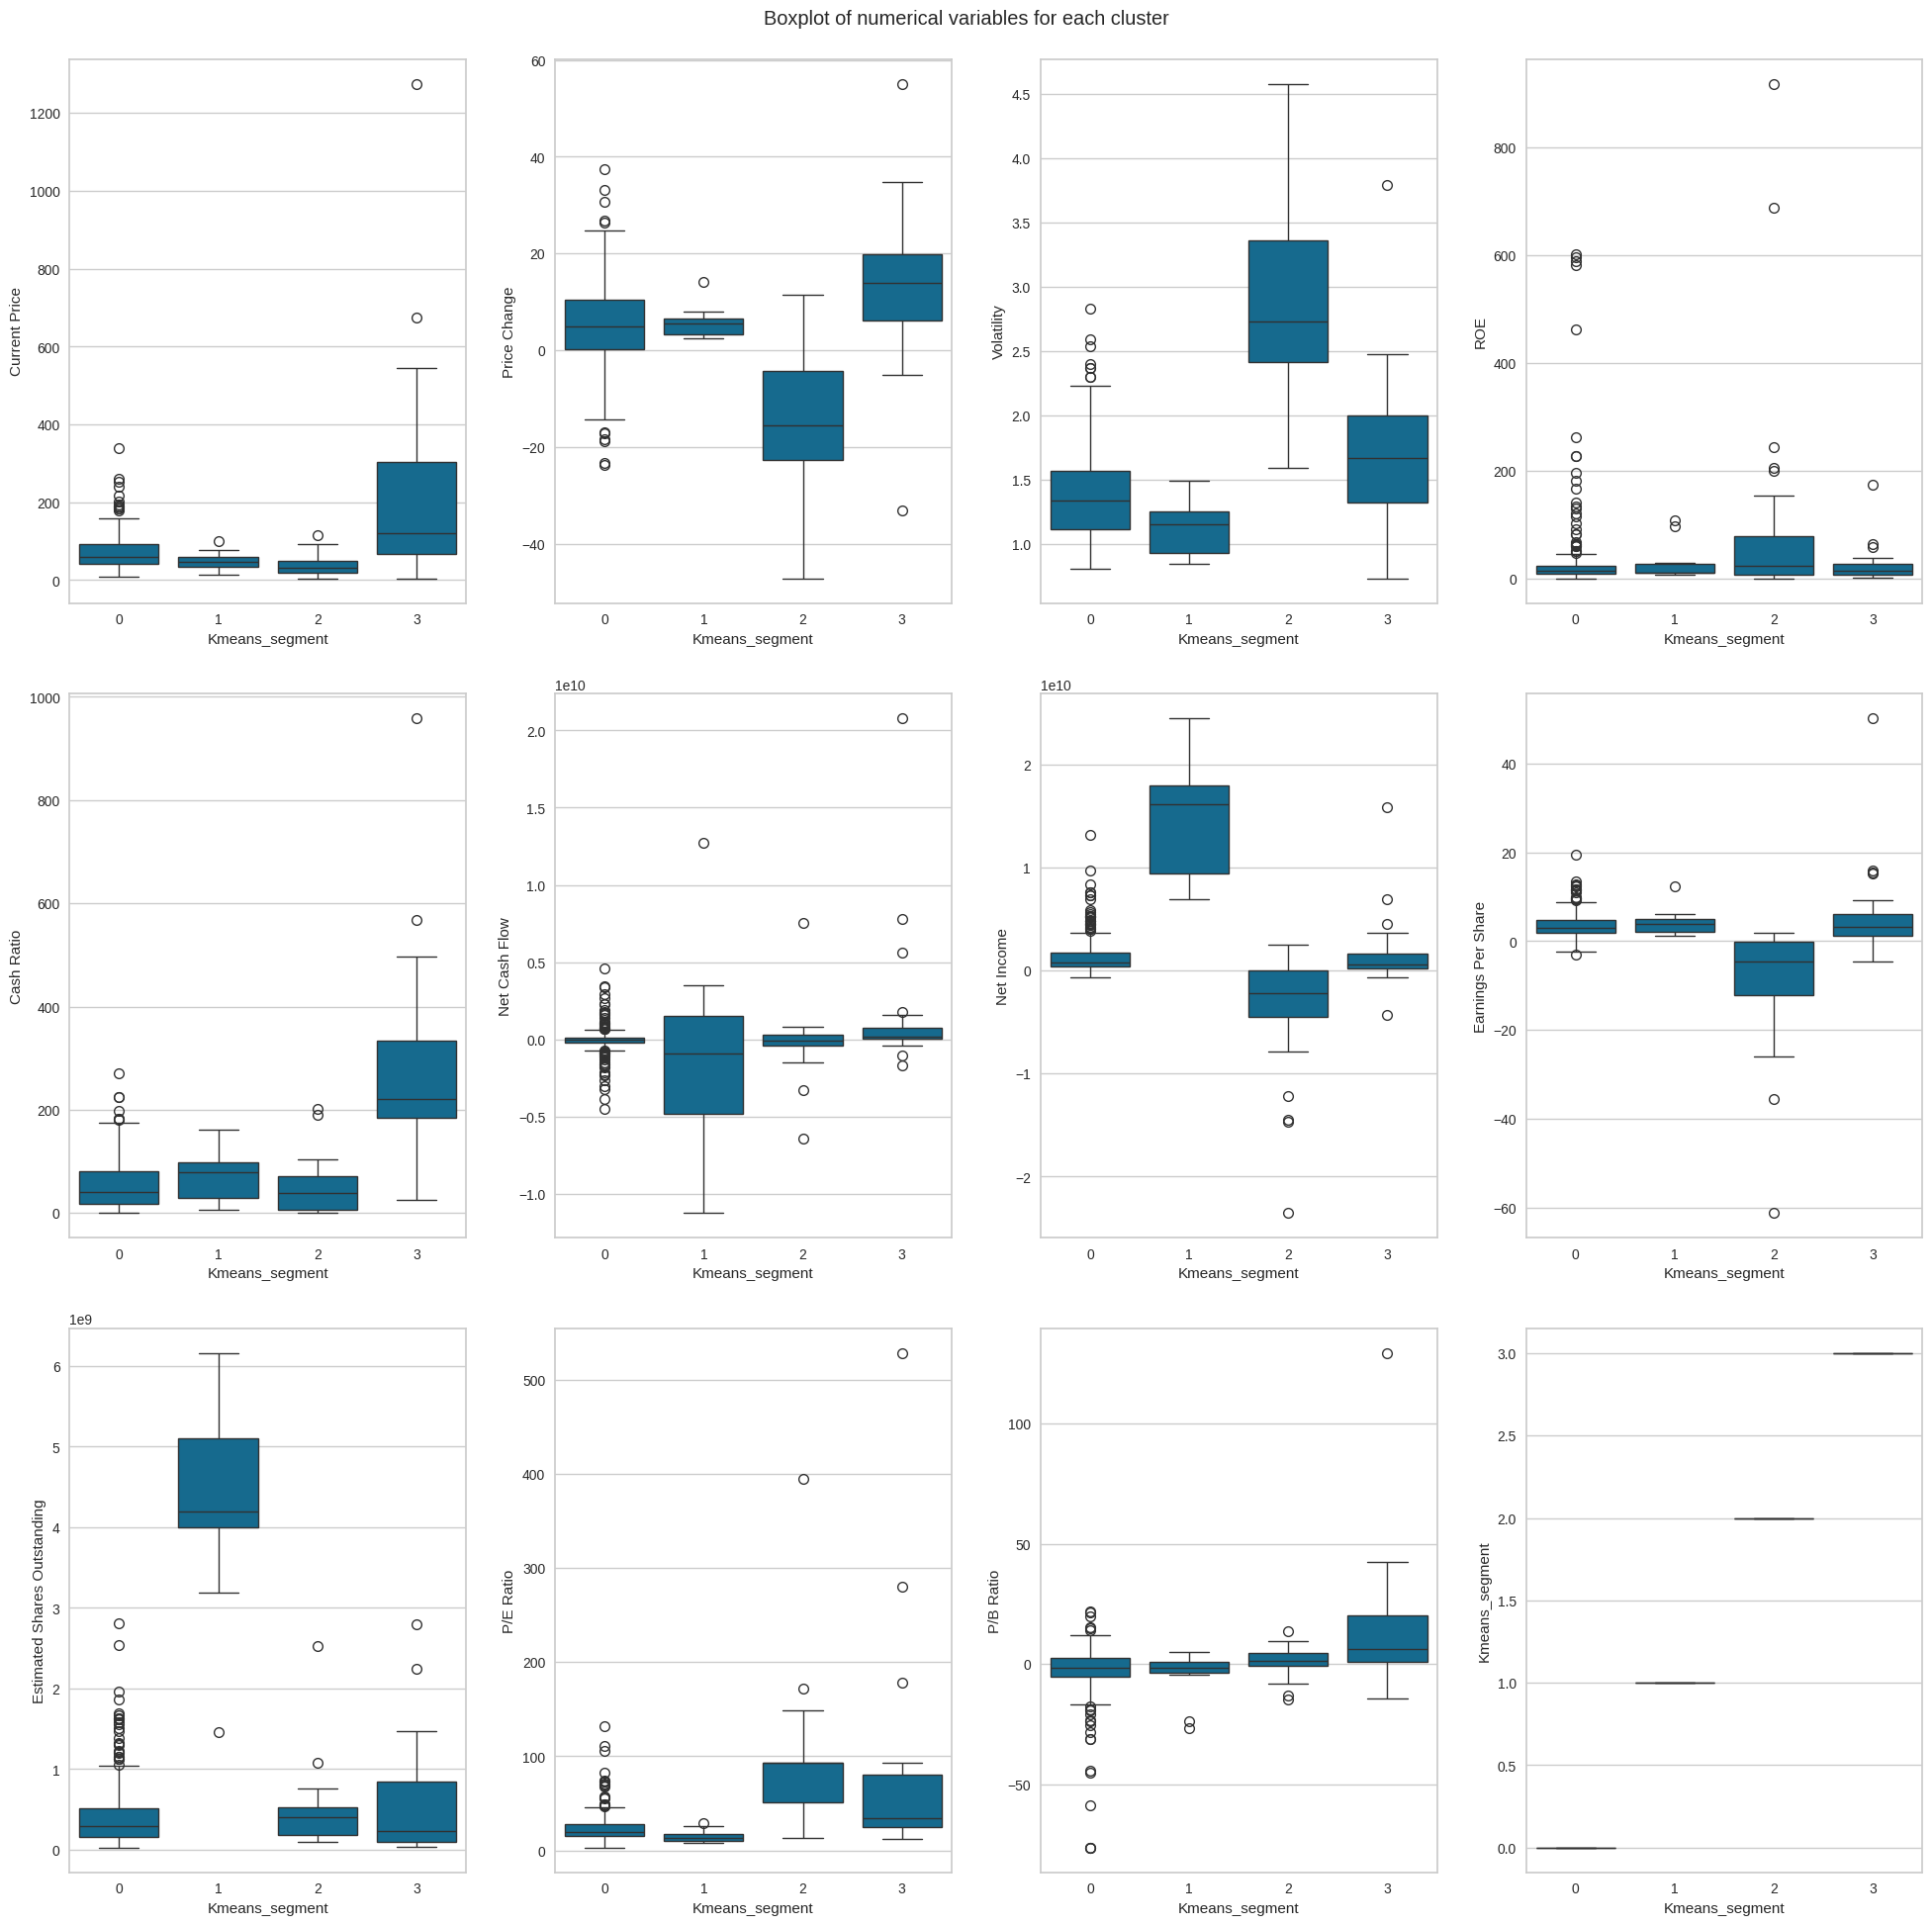

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df1.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="Kmeans_segment", y=variable)

plt.tight_layout(pad=2.0)

###Insights

Cluster 3: The companies in this cluster have really good indicators of profitablity having the highest cash ratio, Price change, Cash Ratio, Net Cash flow, Earnings per share and P/B ratio. It is important to note, the average price of stocks in this cluster is higher than other clusters

Cluster 2: The companies in this cluster on average have the highest ROE, P/E ratio, while these indicate profitability, they also have the highest Volatility which means higher risk of investing

Cluster 1: The companies in this cluster have the highest net income and Estimated Shares Outstanding

Cluster 0: The companies in this cluster are not really offering much in terms of profitability

## Hierarchical Clustering

In [ ]:
#making a copy of the scaled data for hierarchical clustering
hc_df = subset_scaled_df.copy()

###Checking Cophenetic Correlation

In [ ]:
#list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

#list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0,0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic Correlation for {} distance and {} linkage is {}".format(dm.capitalize(),lm,c)
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm = [dm,lm]
print("."*100)
print("The highest cophenetic correlation is {} for {} distance and {} linkage".format(high_cophenet_corr,high_dm_lm[0].capitalize(),high_dm_lm[1]))


Cophenetic Correlation for Euclidean distance and single linkage is 0.9232271494002922
Cophenetic Correlation for Euclidean distance and complete linkage is 0.7873280186580672
Cophenetic Correlation for Euclidean distance and average linkage is 0.9422540609560814
Cophenetic Correlation for Euclidean distance and weighted linkage is 0.8693784298129404
Cophenetic Correlation for Chebyshev distance and single linkage is 0.9062538164750717
Cophenetic Correlation for Chebyshev distance and complete linkage is 0.598891419111242
Cophenetic Correlation for Chebyshev distance and average linkage is 0.9338265528030499
Cophenetic Correlation for Chebyshev distance and weighted linkage is 0.9127355892367
Cophenetic Correlation for Mahalanobis distance and single linkage is 0.925919553052459
Cophenetic Correlation for Mahalanobis distance and complete linkage is 0.7925307202850002
Cophenetic Correlation for Mahalanobis distance and average linkage is 0.9247324030159736
Cophenetic Correlation for Ma

Exploring different different linkage methods with Euclidean distance only


In [ ]:
#list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

print(
    "The highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
The highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


The maximum cophenetic correlation is with Euclidean distance and Average linkage

###Checking Dendrograms

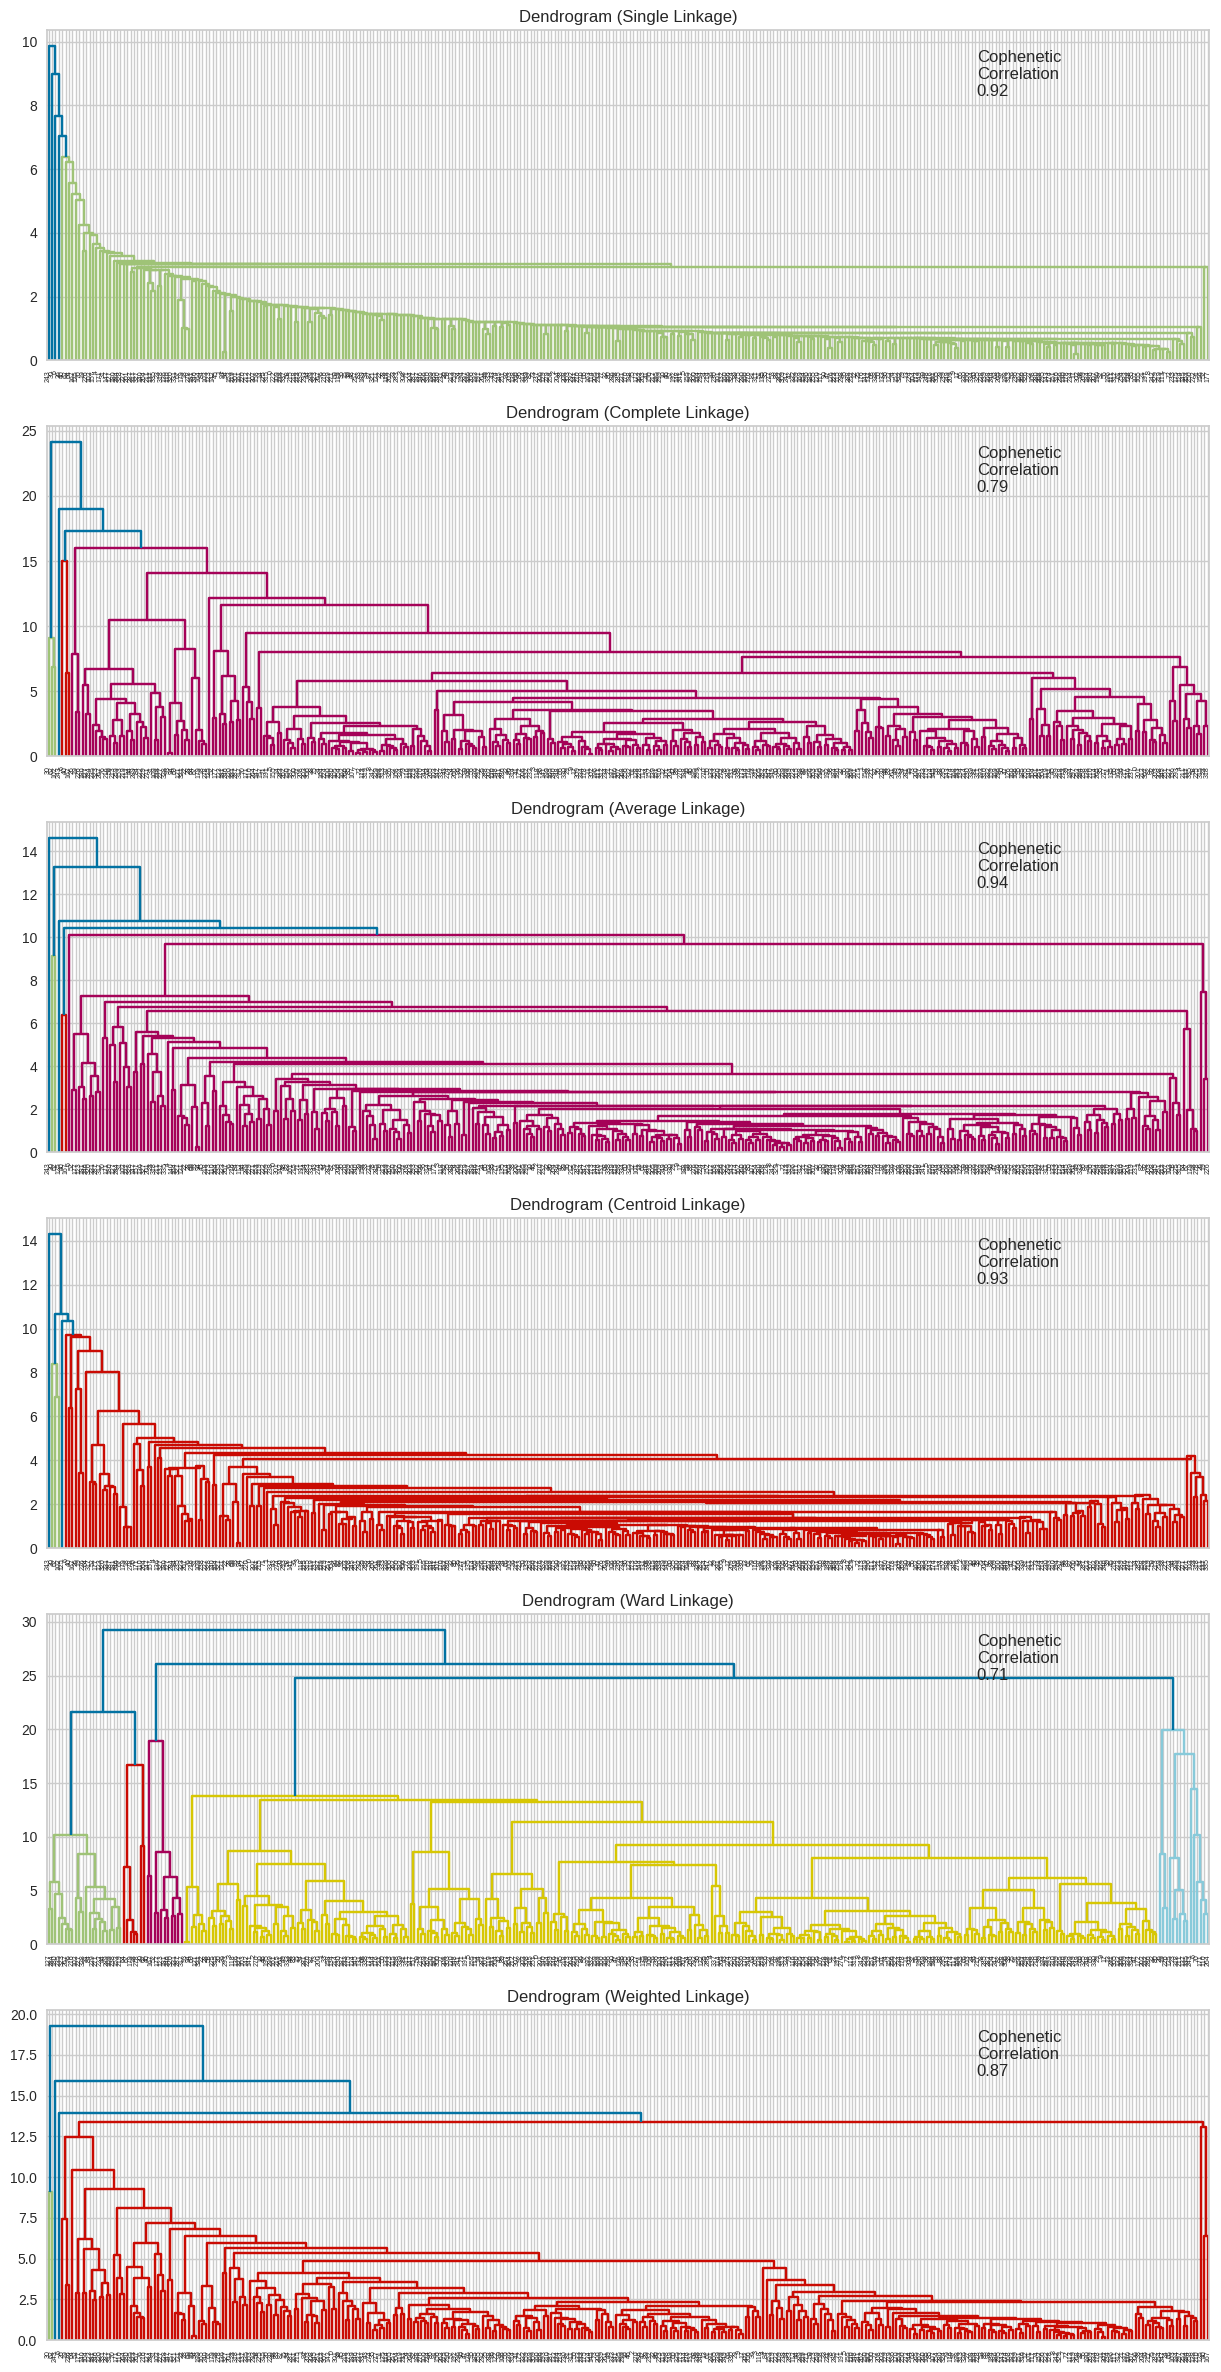

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

#Plotting the dendrogram and calculate the cophenetic correlation for each linkage method
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Average linkage has the highest cophenetic correlation
but the Ward linkage is giving well differentiated clusters


###Model with ward linkage

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
#creating a copy of the original dataframe and adding cluster labels
df2 = data.copy()

hc_df["HC_segment"] = HCmodel.labels_
df2["HC_segment"] = HCmodel.labels_

###Cluster Profiling

In [ ]:
#grouping the clusters and the getting the means of numeric attributes
hc_cluster_profile = df2.groupby("HC_segment").mean(numeric_only=True)

In [ ]:
hc_cluster_profile["count_in_each_segment"] = df2.groupby("HC_segment")["Security"].count().values

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segment,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


In [ ]:
for cl in df2["HC_segment"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segment"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [ ]:
df2.groupby(["HC_segment", "GICS Sector"])['Security'].count()

HC_segment  GICS Sector                
0           Consumer Discretionary          3
            Consumer Staples                1
            Health Care                     5
            Information Technology          4
            Real Estate                     1
            Telecommunications Services     1
1           Consumer Discretionary          1
            Consumer Staples                2
            Energy                          2
            Financials                      1
            Industrials                     1
2           Consumer Discretionary          1
            Consumer Staples                1
            Energy                          1
            Financials                      4
            Health Care                     1
            Information Technology          1
            Telecommunications Services     2
3           Consumer Discretionary         35
            Consumer Staples               15
            Energy                      

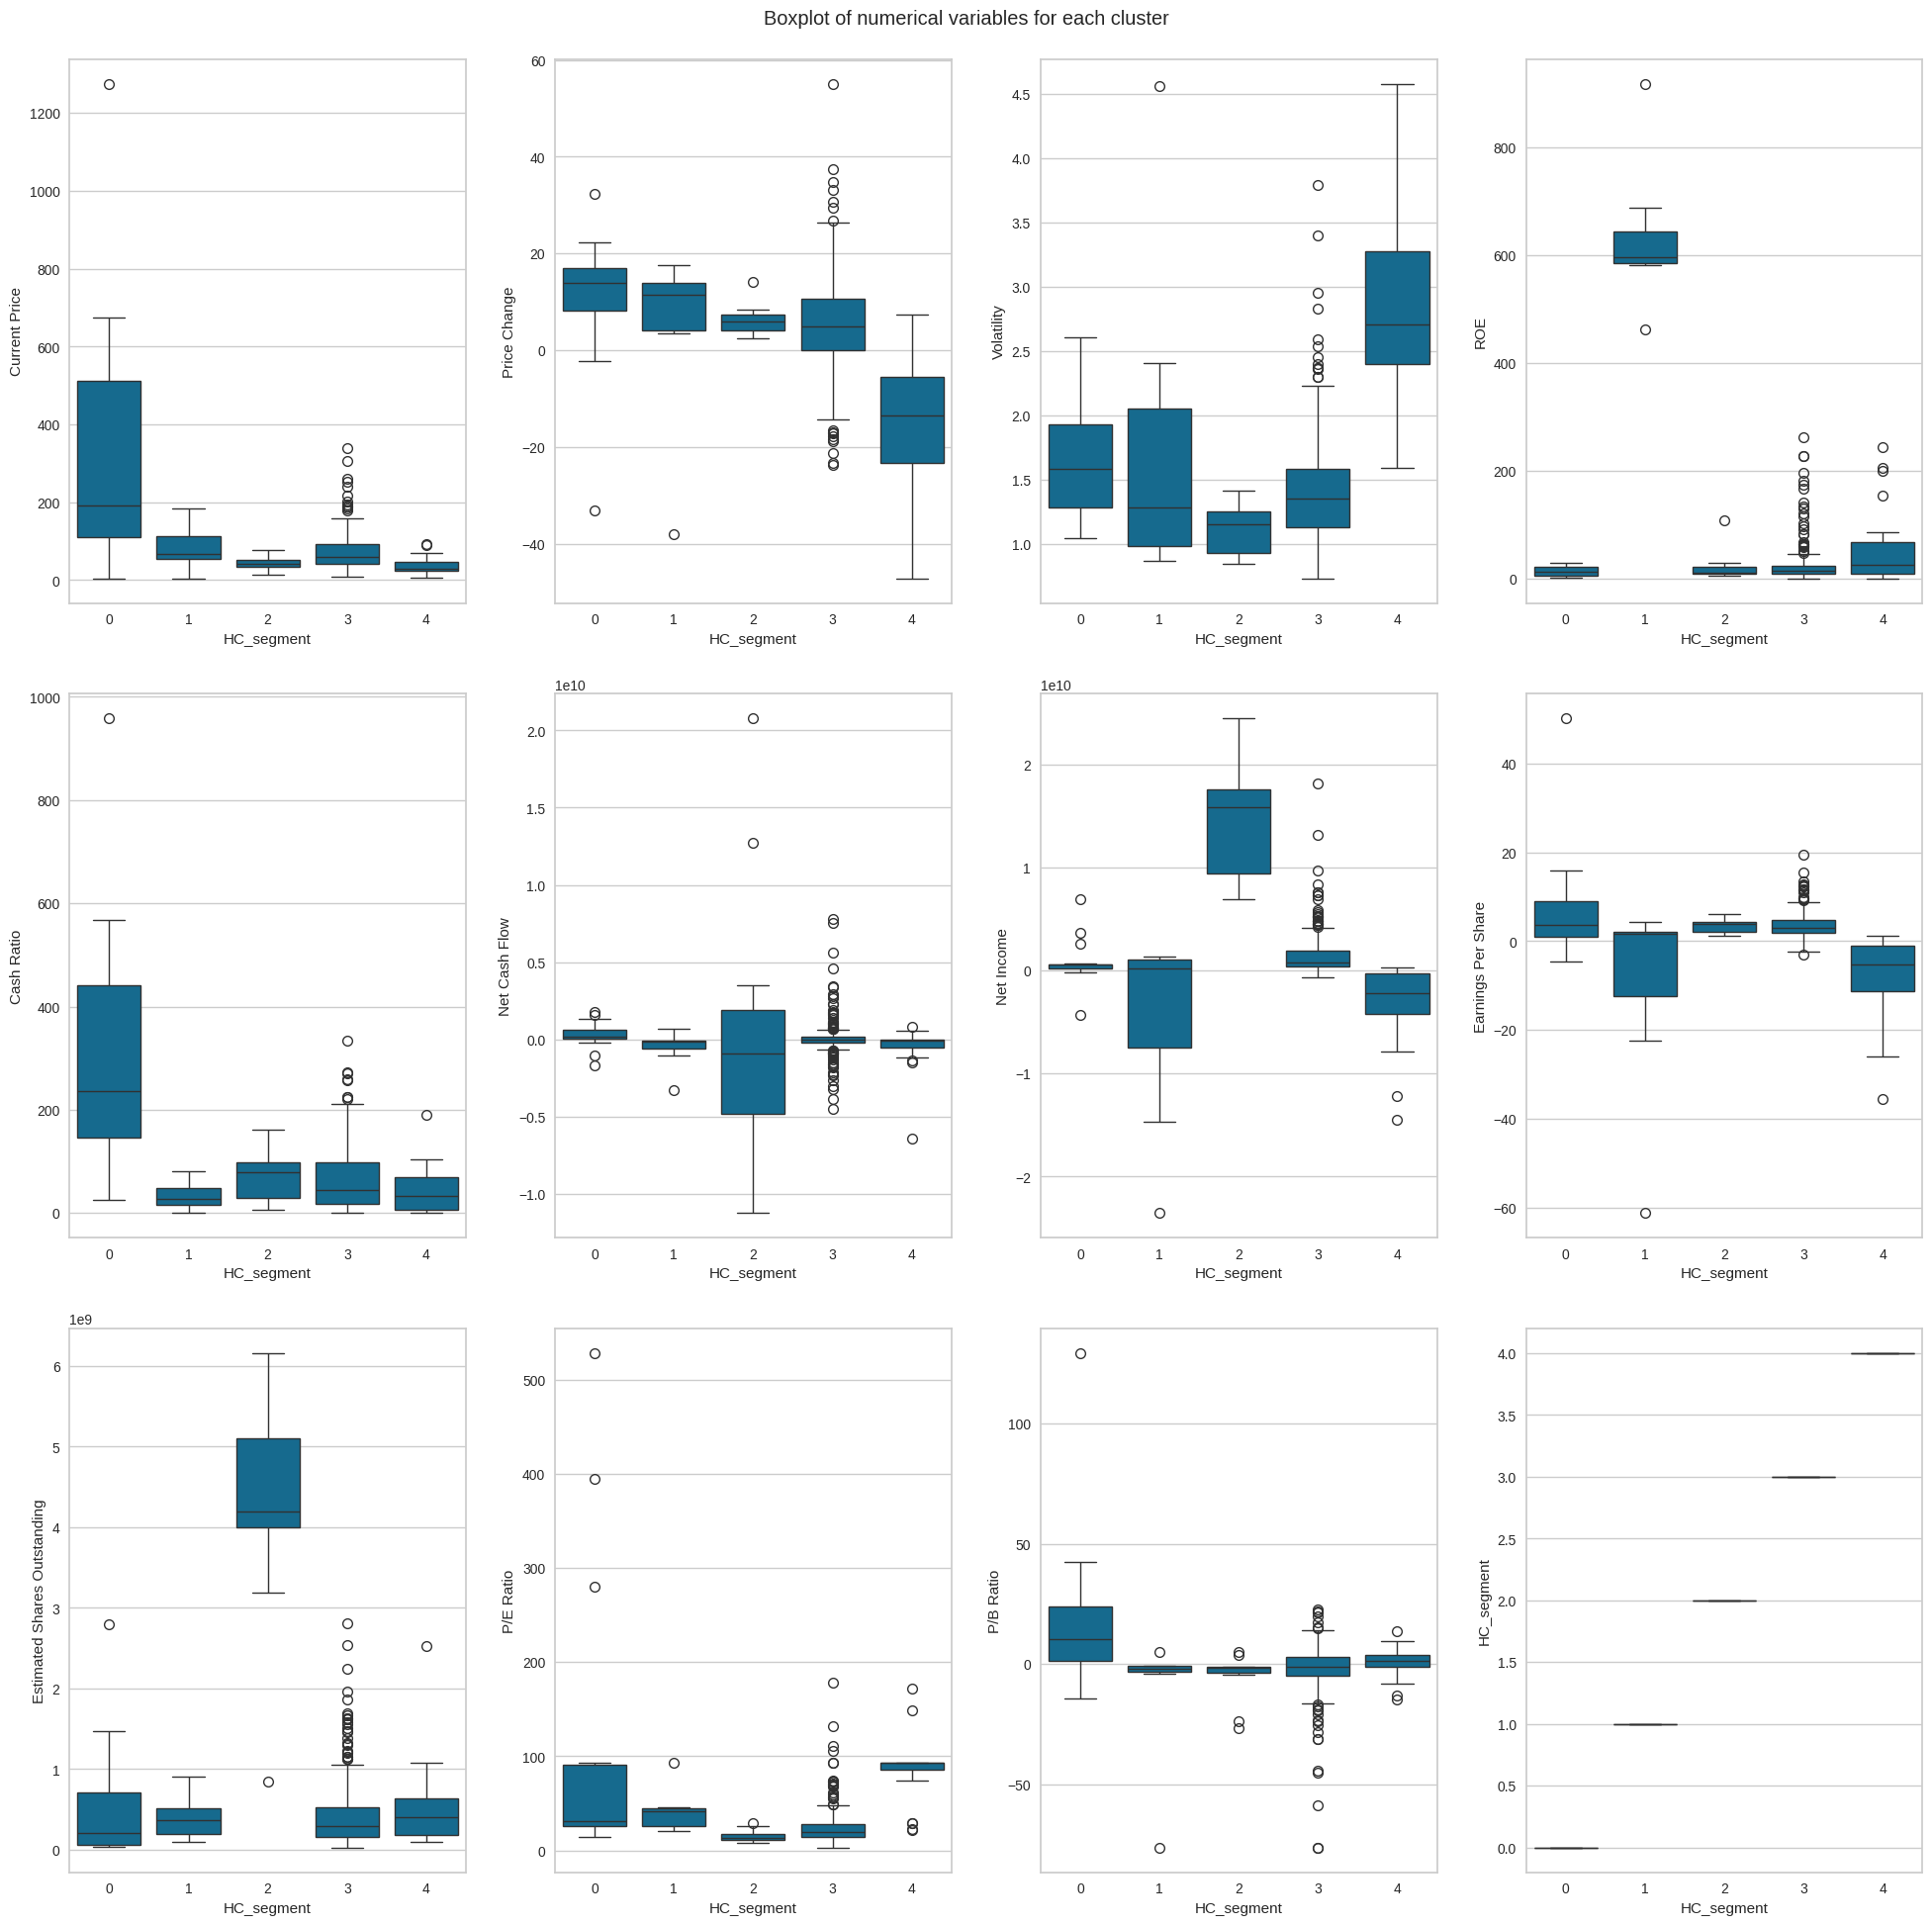

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

num_col = df2.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segment", y=variable)

plt.tight_layout(pad=2.0)

###Insights


Cluster 0: The companies in this cluster, on average, have the highest current price, price change, cash ratio, earnings per share, P/B ratio

Cluster 1: The companies have the highest ROE on average

Cluster 2: The companies in this cluster have the highest net_income, estimated shares outstanding

Cluster 3: This cluster has the highest number of data points and there isn't any obvious indicator of profitablity for the companies in this cluster

Cluster 4: The companies here have the highest volatility on average

## K-means vs Hierarchical Clustering

The K-means clustering technique took more time to execute.

Hierarchical clustering gave more distinct clusters and it was easier to choose a suitable number of clusters due to the dendrograms

Similarity between clusters of both algorithms:

Cluster 3 of K-means is similar to cluster 0 of Hierarchical clustering and they have 25 and 15 points respectively.

Cluster 0 of K-means is similar to cluster 3 of the hierarchical clustering. They have 277 and 285 data points respectively

From the K-means algorithm, 4 clusters were obtained while 5 clusters were obtained from the Hierarchical clustering algorithm.

## Actionable Insights and Recommendations

The companies in cluster 3 of the K-means algorithm and cluster 0 of the Hierarchical clustering algorithm have really good indicators of profitability.

The firm can suggest companies from this clusters to their customers for profitable investments.

Companies in cluster 2 of the K-means algorithm and Cluster 4 of the Hierarchical method have the highest volatility on average, investing in these companies could pose potential risks.

For further analysis, more financial metrics can be evaluated to make better insights.